Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files, sum properties, and plot

Households

In [86]:
csv_files = glob.glob("..\Datalogs\Household*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_households = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
households = sum_df.reset_index(drop=True)


Consumer Firms

In [87]:
csv_files = glob.glob("..\Datalogs\Consumer*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_cons_firms = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
cons_firms = sum_df.reset_index(drop=True)


Capital Firms

In [88]:
csv_files = glob.glob("..\Datalogs\Capital*.csv")

sum_list = []

for file in csv_files:
    df = pd.read_csv(file)
    n_cap_firms = df.shape[0]
    sum_list.append(df.sum())

sum_df = pd.concat(sum_list, axis=1).T
cap_firms = sum_df.reset_index(drop=True)

Take averages

In [89]:
households_average = households.apply(lambda x: x/n_households)
cons_firms_average = cons_firms.apply(lambda x: x/n_cons_firms)
cap_firms_average = cap_firms.apply(lambda x: x/n_cap_firms)

In [90]:
t = np.linspace(0,36,37)

### Check data and fix smt up

In [92]:
households.head()

,wealth_human,expenditure_consumption,expenditure_tax,consumption_propensity,new_savings,cash_on_hand_real_desired,cash_on_hand_desired,cash_on_hand_current,saving_propensity,saving_propensity_optimist,saving_propensity_pessimist,income_current,income_average,income_wage,income_unemployment_benefit,income_gov_transfers,income_firm_owner_dividend,unemployed,reservation_wage,unemp_duration,unemp_duration_upper_bound,positive_sentiment,business_owner,c_f,c_h,c_excess_money,p_majority_op_adoption
0,7.310000e+02,0.0,0.0,1.320518,0.000000e+00,0.0,0.0,0.0,0.50684,0.50684,0.70684,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2540.0,0.0,11.0,2.0,0.0,1.213679,0.50684,0.70684,0.927358
1,5.448990e+05,133525.0,0.0,1.320518,5.441680e+05,0.0,-1103963.0,0.0,0.70684,0.50684,0.70684,3006.0,-3.123660e+06,3006.0,0.0,0.0,0.0,0.0,2540.0,0.0,11.0,0.0,0.0,1.213679,0.50684,0.70684,0.927358
2,7.922345e+08,0.0,0.0,1.320518,7.922330e+08,0.0,-259825020.0,0.0,0.50684,0.50684,0.70684,3006.0,-9.157247e+08,3006.0,0.0,0.0,0.0,0.0,2540.0,0.0,11.0,2.0,0.0,1.213679,0.50684,0.70684,0.927358
3,9.983926e+08,0.0,0.0,1.320518,9.983921e+08,0.0,-308794992.0,0.0,0.50684,0.50684,0.70684,3006.0,-1.088183e+09,3006.0,0.0,0.0,0.0,0.0,2540.0,0.0,11.0,2.0,0.0,1.213679,0.50684,0.70684,0.927358
4,1.238356e+09,0.0,0.0,1.320518,1.238355e+09,0.0,-359407964.0,0.0,0.50684,0.50684,0.70684,3006.0,-1.266432e+09,3006.0,0.0,0.0,0.0,0.0,2540.0,0.0,11.0,2.0,0.0,1.213679,0.50684,0.70684,0.927358


In [93]:
cons_firms.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
0,6800.0,0.0,0.0,3331.0,0.0,0.0,0.0,0.0,13.3578,9.5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14197.0,0.0,14197.0,0.083578,0.083578,0.063578,0.0,1503.0,58.0,58.0,1.0,0.0,0.0,13327.0,68.0,1.91973,0.00000,1.0,0.0,1.0,0.0,3331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0
1,4400.0,4400.0,0.0,3331.0,0.0,44494.0,0.0,0.0,13.3578,13.3578,0.0,3006.0,0.0,0.0,0.0,0.0,0.0,14197.0,0.0,66132.0,0.083578,0.075612,0.071801,2.0,1503.0,44.0,44.0,1.0,0.0,1.0,14296.0,73.0,1.61255,4.29180,1.0,0.0,1.0,44494.0,3331.0,0.0,0.0,66132.0,0.0,0.0,0.0,1.0,10965.0,1.0,34.00000,5.0
2,9600.0,21951.0,0.0,9200.0,0.0,347906.0,0.0,0.0,46.9555,37.8159,0.0,27054.0,0.0,0.0,0.0,0.0,13287.0,14197.0,0.0,144288.0,0.083578,0.074704,0.033337,18.0,1503.0,96.0,79.0,1.0,0.0,1.0,9600.0,96.0,1.61096,1.25984,1.0,0.0,1.0,184262.0,7620.0,0.0,0.0,144288.0,0.0,0.0,0.0,1.0,14820.0,1.0,5.33333,0.0
3,9600.0,20714.0,0.0,9600.0,0.0,450772.0,0.0,0.0,65.3405,46.9555,0.0,28557.0,0.0,0.0,0.0,0.0,15400.0,14197.0,0.0,144288.0,0.083578,0.062598,0.033235,19.0,1503.0,96.0,78.0,1.0,0.0,1.0,9600.0,101.0,1.36399,1.17907,1.0,0.0,1.0,218118.0,8142.0,0.0,0.0,144288.0,0.0,0.0,0.0,1.0,13094.0,1.0,5.05263,5.0
4,10100.0,21533.0,0.0,9600.0,0.0,627269.0,0.0,0.0,67.2066,65.3405,0.0,31563.0,0.0,0.0,0.0,0.0,18229.0,14197.0,0.0,151803.0,0.083578,0.062949,0.032119,21.0,1503.0,101.0,82.0,1.0,0.0,1.0,10100.0,106.0,1.39496,1.16574,1.0,0.0,1.0,266682.0,8664.0,0.0,0.0,151803.0,0.0,0.0,0.0,1.0,13391.0,1.0,4.80952,5.0


In [94]:
cap_firms.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
0,680.0,0.0,0.0,214.0,0.0,0.0,0.0,0.0,13.3578,9.5000,0.0,3006.0,0.0,0.0,0.0,0.0,0.0,14197.0,0.0,14197.0,0.083578,0.083578,0.063578,2.0,1503.0,58.0,58.0,1.0,0.0,0.0,859.0,68.0,1.91973,0.00000,1.0,0.0,0.0,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,680.0,721.0,0.0,214.0,0.0,2858.0,0.0,0.0,13.3578,13.3578,0.0,3006.0,0.0,0.0,0.0,0.0,0.0,14197.0,0.0,14197.0,0.083578,0.085292,0.074148,2.0,1503.0,7.0,5.0,1.0,0.0,1.0,1318.0,72.0,1.68516,6.15888,1.0,0.0,0.0,2858.0,214.0,0.0,0.0,10521.0,0.0,0.0,0.0,1.0,1145.0,1.0,34.0,4.0
2,860.0,2536.0,0.0,821.0,0.0,10966.0,0.0,0.0,13.3578,13.3578,0.0,6012.0,0.0,0.0,0.0,0.0,648.0,14197.0,0.0,37575.0,0.083578,0.076568,0.090688,4.0,1503.0,25.0,22.0,1.0,0.0,1.0,1453.0,89.0,3.11023,2.31002,1.0,0.0,0.0,8438.0,629.0,0.0,0.0,37575.0,0.0,0.0,0.0,1.0,2550.0,1.0,21.5,3.0
3,890.0,3044.0,0.0,857.0,0.0,11447.0,0.0,0.0,13.3578,13.3578,0.0,7515.0,0.0,0.0,0.0,0.0,705.0,14197.0,0.0,45090.0,0.083578,0.067006,0.077460,5.0,1503.0,30.0,26.0,1.0,0.0,1.0,1480.0,90.0,3.49535,2.17009,1.0,0.0,0.0,9153.0,682.0,0.0,0.0,45090.0,0.0,0.0,0.0,1.0,3005.0,1.0,17.8,1.0
4,900.0,2811.0,0.0,890.0,0.0,11888.0,0.0,0.0,13.3578,13.3578,0.0,7515.0,0.0,0.0,0.0,0.0,764.0,14197.0,0.0,45090.0,0.083578,0.073791,0.069277,3.0,1503.0,28.0,25.0,1.0,0.0,1.0,1484.0,91.0,3.04940,2.01084,1.0,0.0,0.0,9905.0,738.0,0.0,0.0,45090.0,0.0,0.0,0.0,1.0,2713.0,1.0,30.0,1.0


#### Plot some household stuff

In [95]:
cols = households.columns
cols

Index(['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage',
       'income_unemployment_benefit', 'income_gov_transfers',
       'income_firm_owner_dividend', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment',
       'business_owner', 'c_f', 'c_h', 'c_excess_money',
       'p_majority_op_adoption'],
      dtype='object')

In [96]:
cols = ['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current',
       'income_current', 'income_average', 'income_wage']

In [97]:
average_cols = households_average.columns
average_cols

Index(['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage',
       'income_unemployment_benefit', 'income_gov_transfers',
       'income_firm_owner_dividend', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment',
       'business_owner', 'c_f', 'c_h', 'c_excess_money',
       'p_majority_op_adoption'],
      dtype='object')

In [98]:
average_cols =  [ 'wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment']

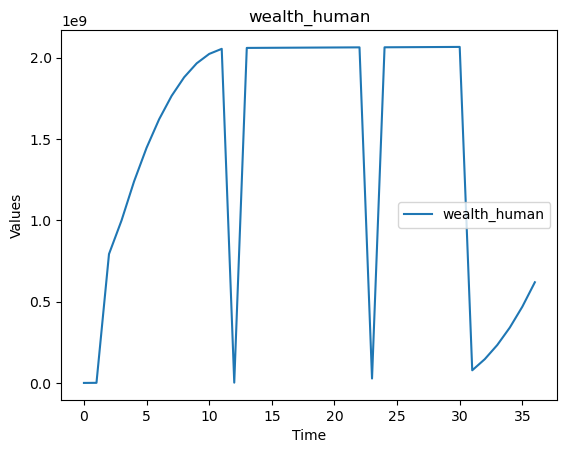

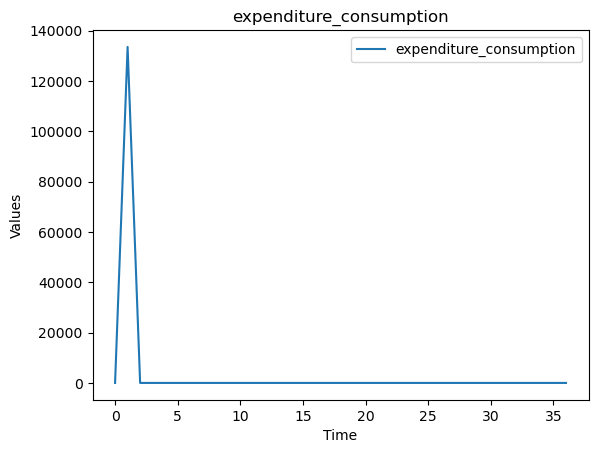

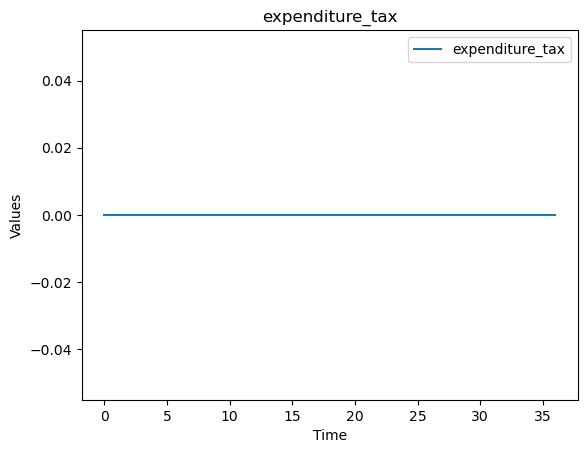

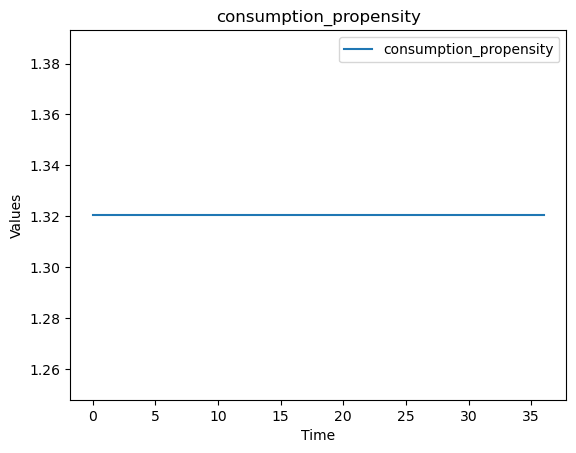

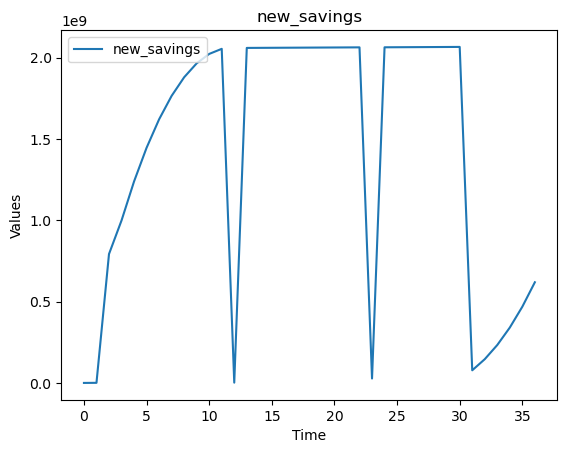

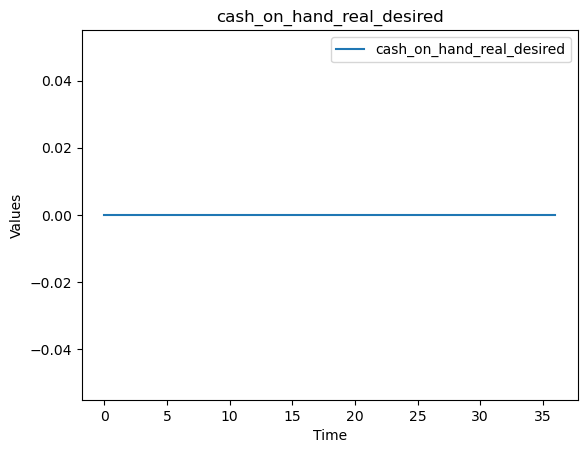

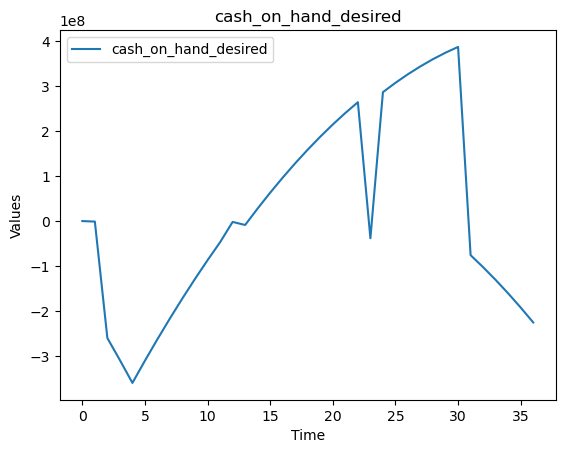

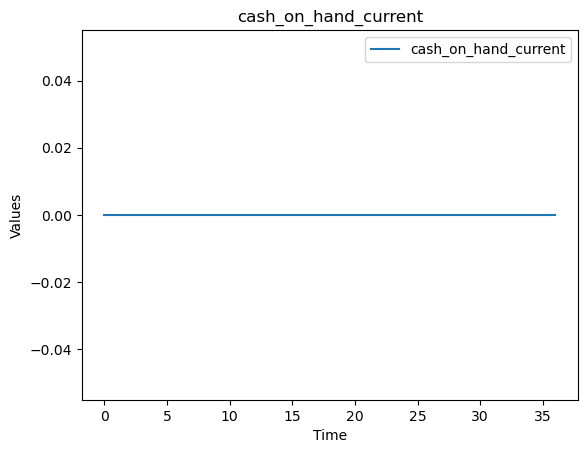

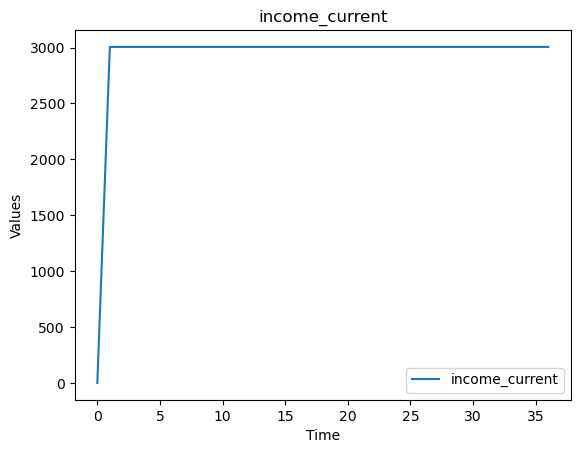

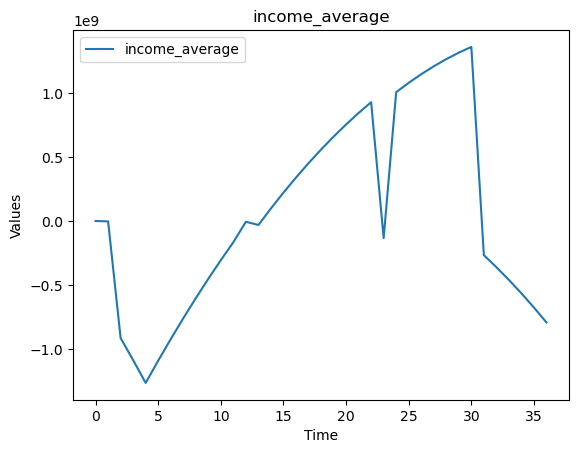

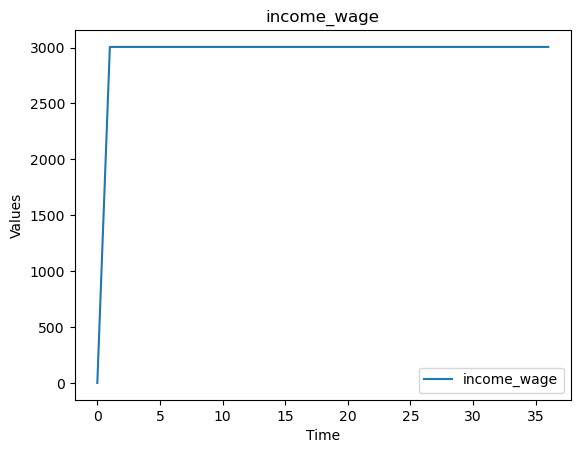

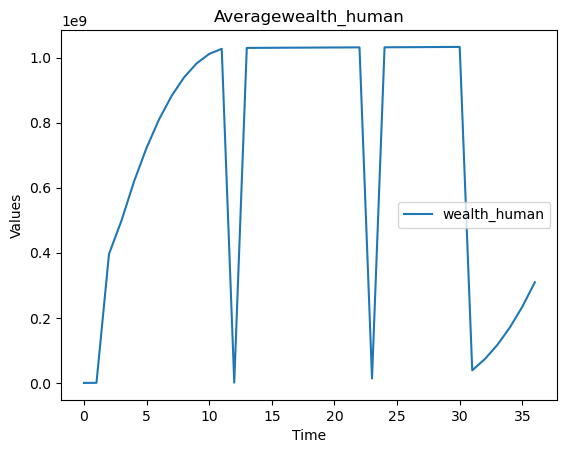

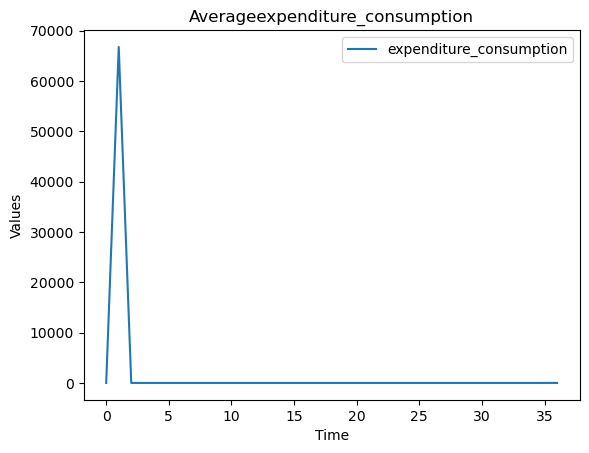

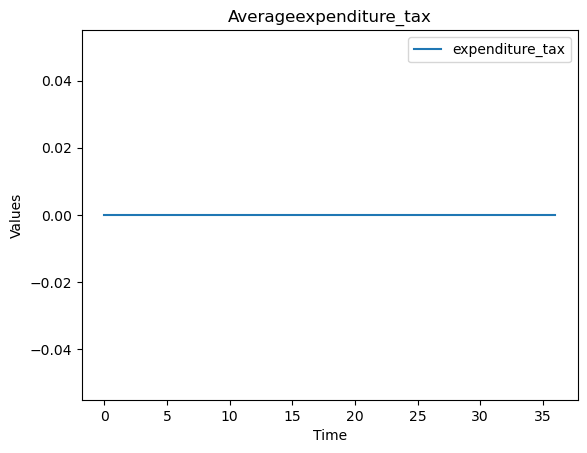

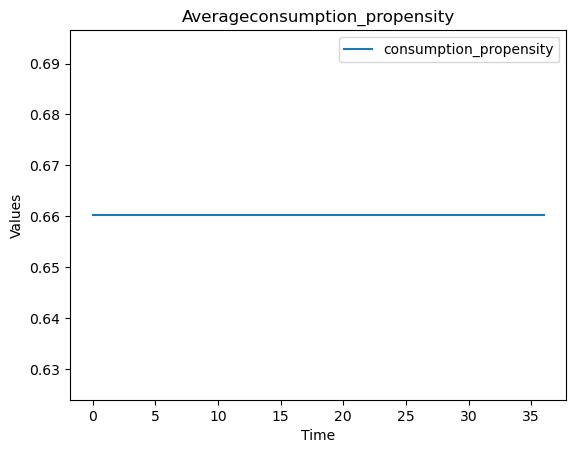

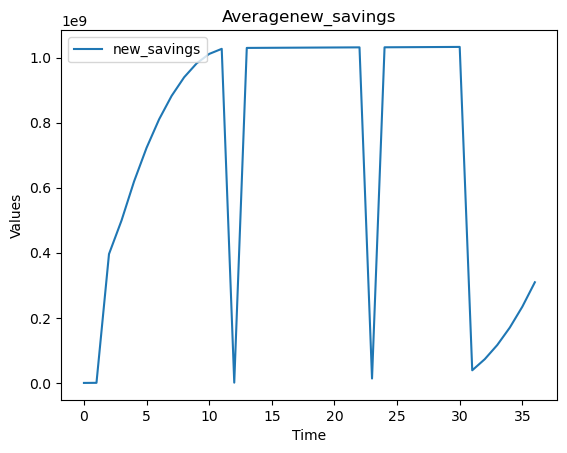

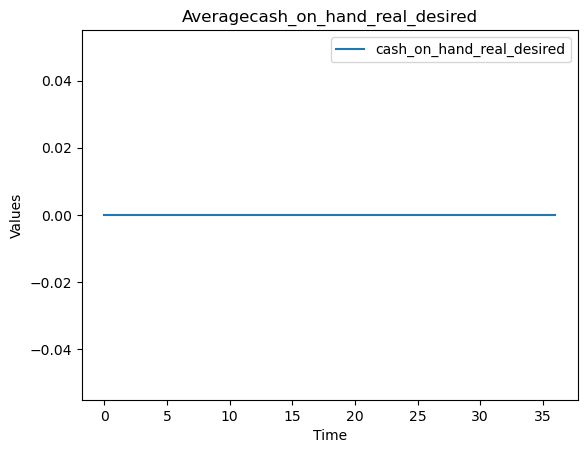

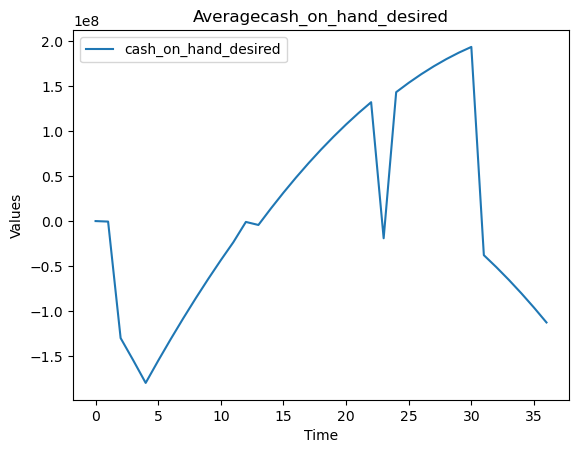

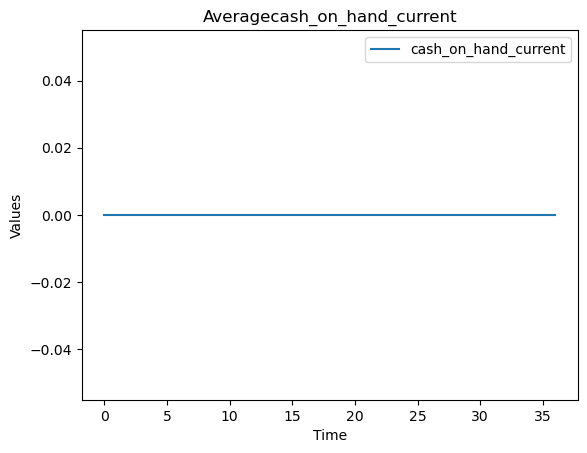

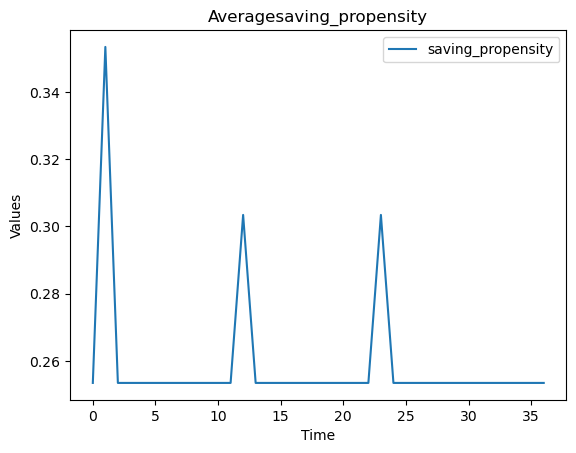

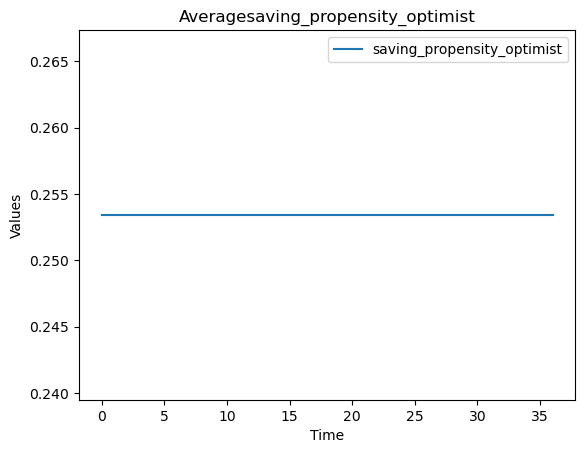

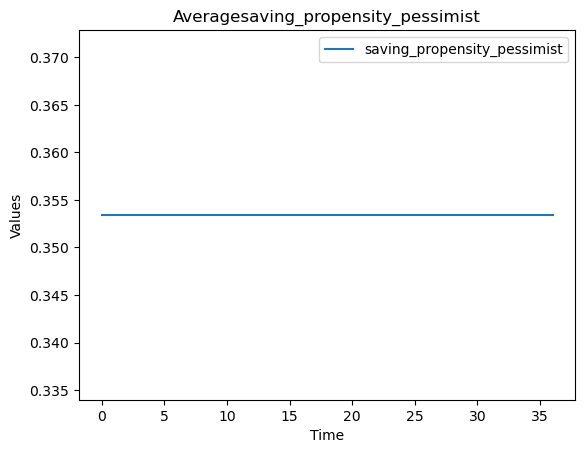

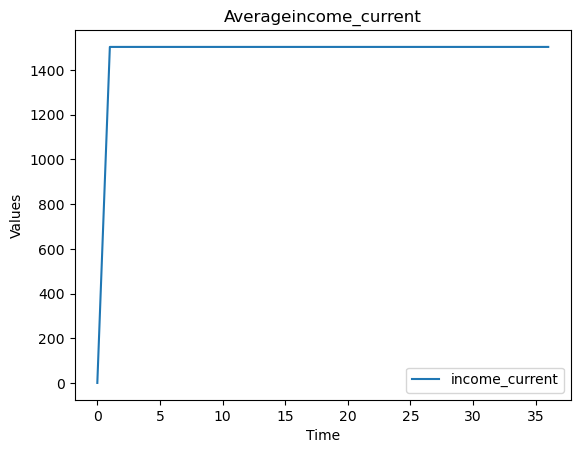

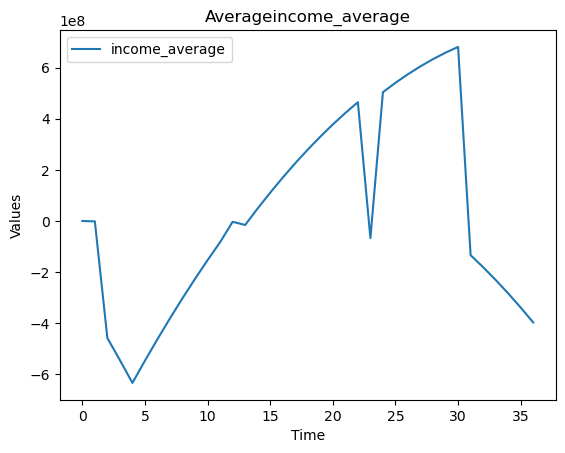

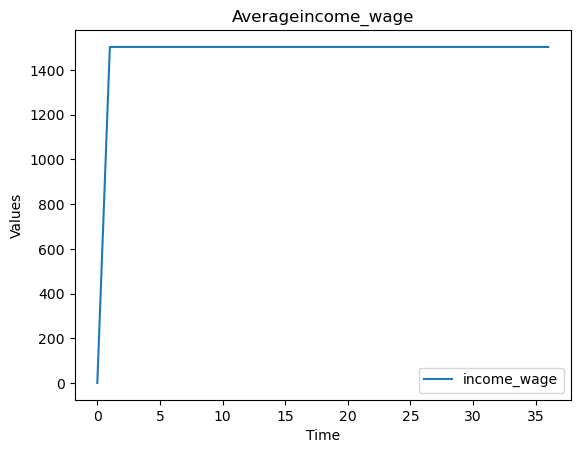

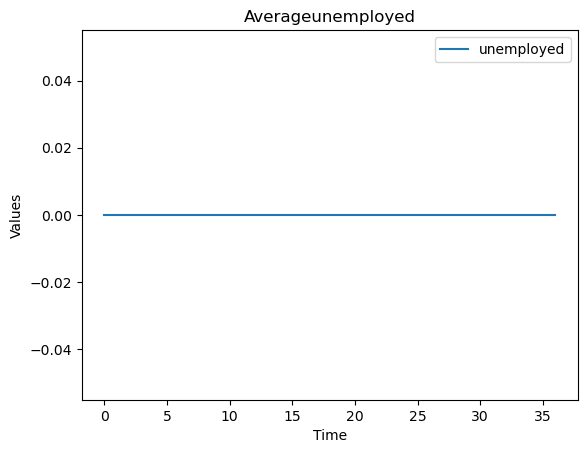

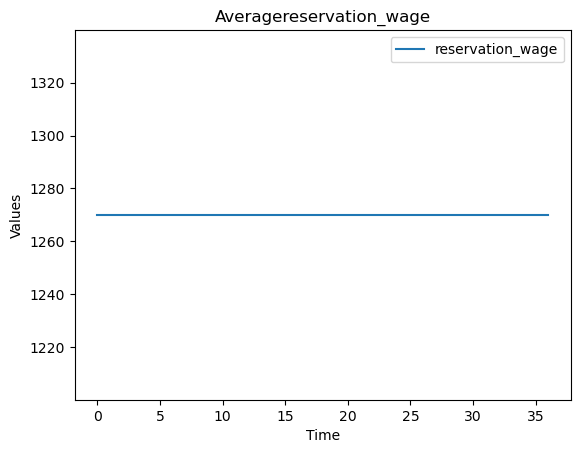

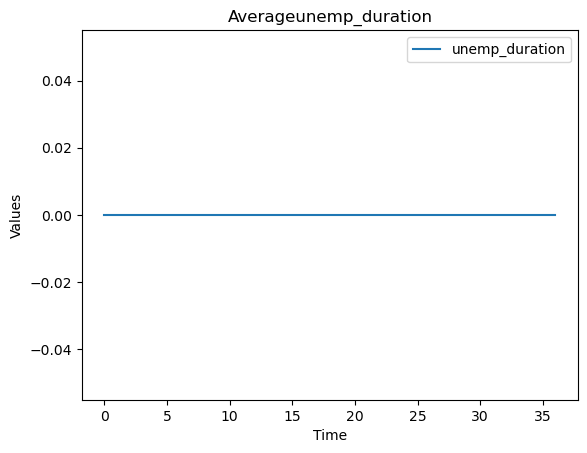

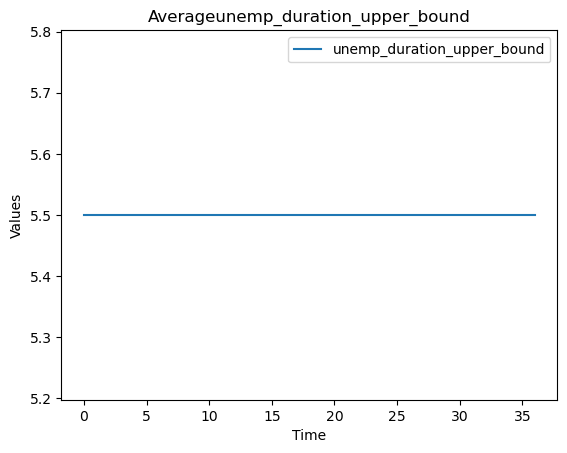

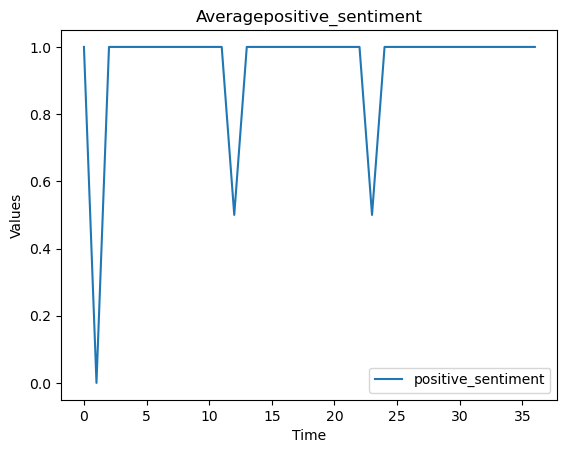

In [99]:
for column in cols:
    plt.plot(t, households[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(column)
    plt.legend()
    plt.show()
    
#averages
for column in average_cols:
    plt.plot(t, households_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

#### Plot some cons and cap firm stuff

In [100]:
cols = cons_firms.columns
average_cols = cons_firms.columns
cols

Index(['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies', 'good_price_current', 'good_price_past',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term

In [101]:
cols = ['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term_shortfall',
       'labor_utilization', 'desired_inventory', 'inventory_reaction_factor',
       'machine_utilization', 'desired_machines']

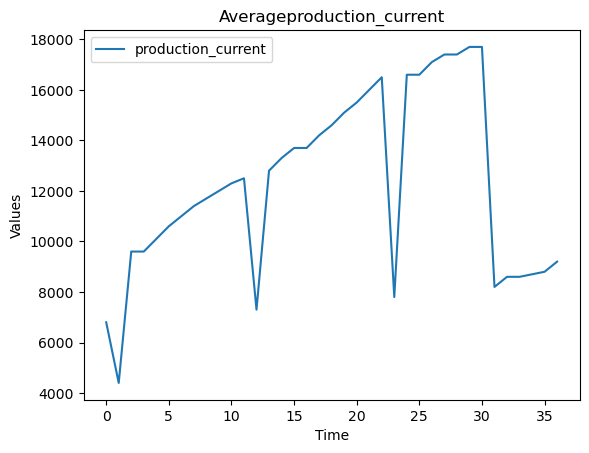

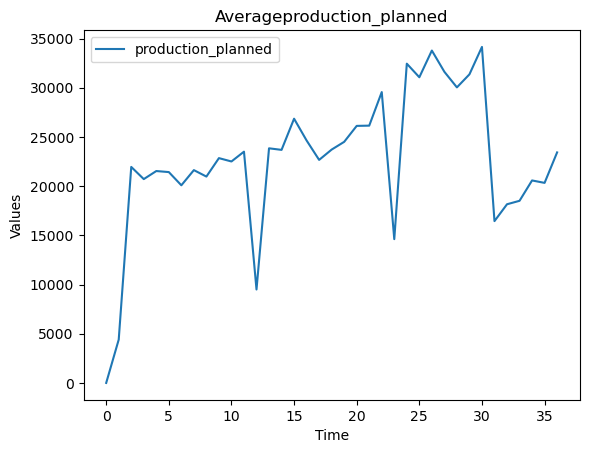

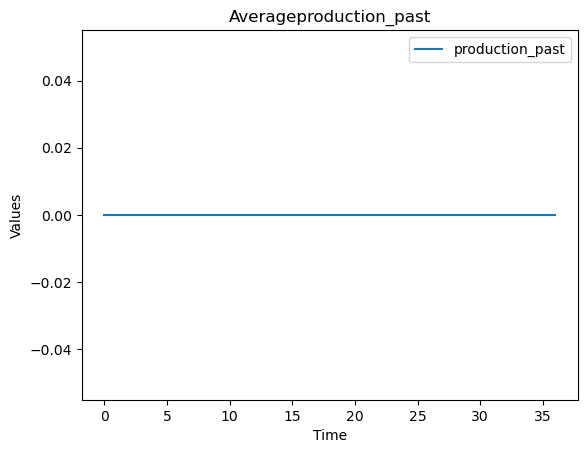

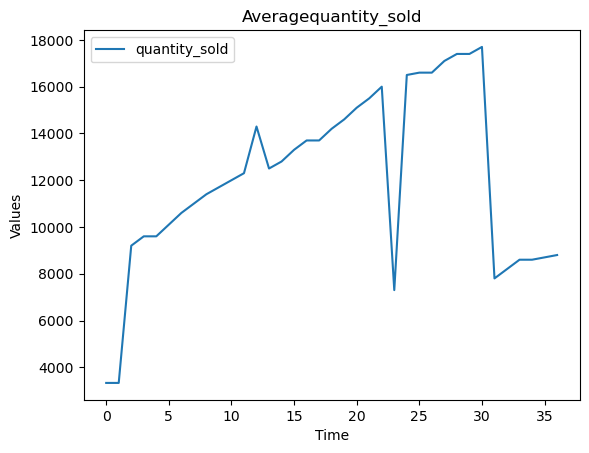

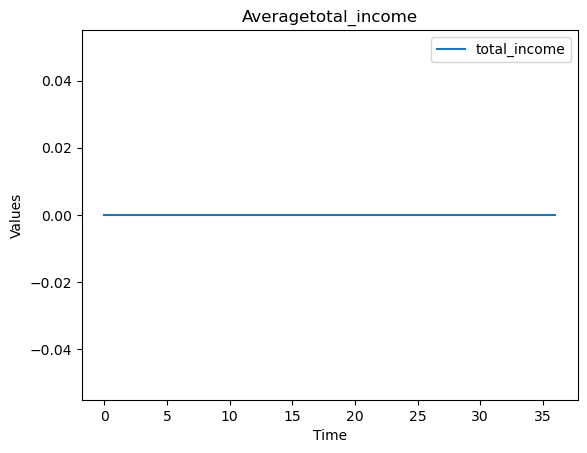

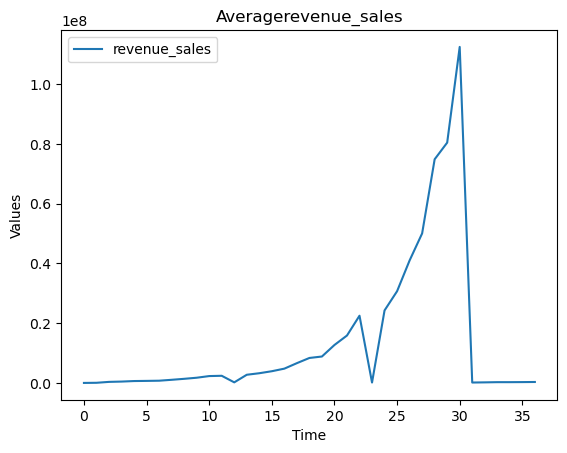

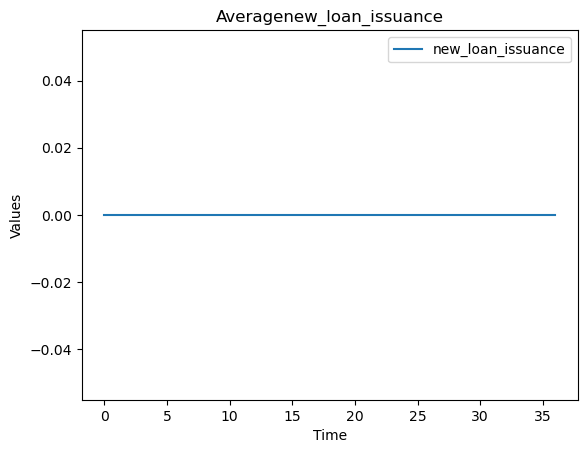

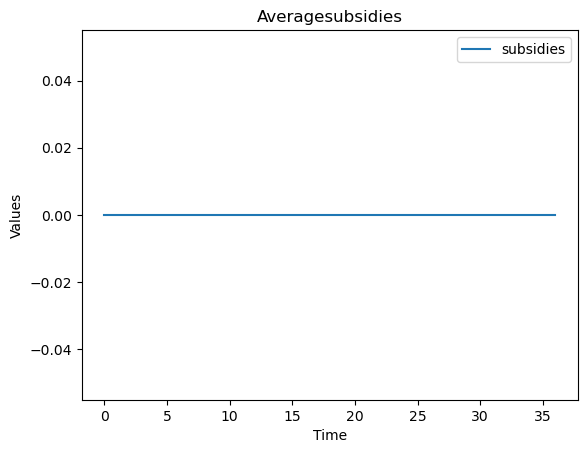

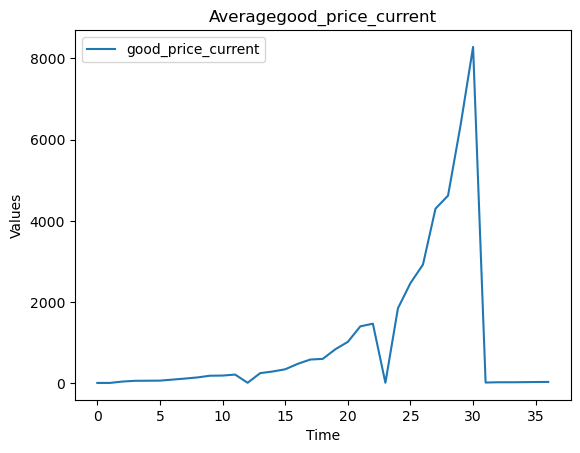

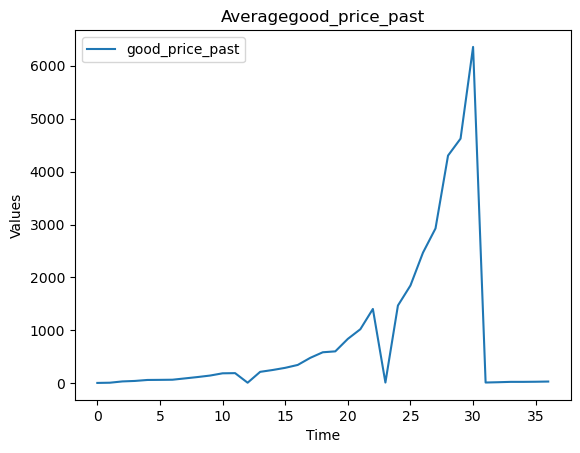

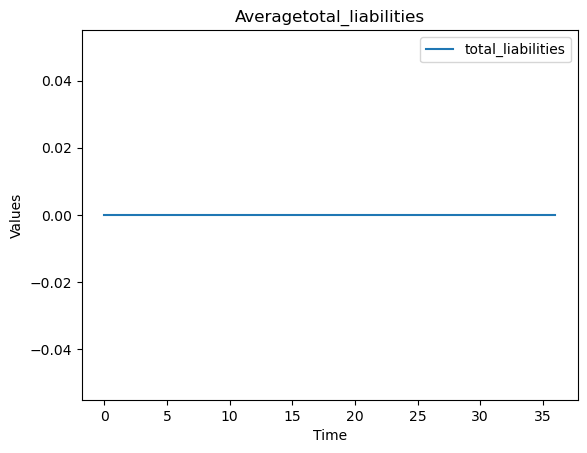

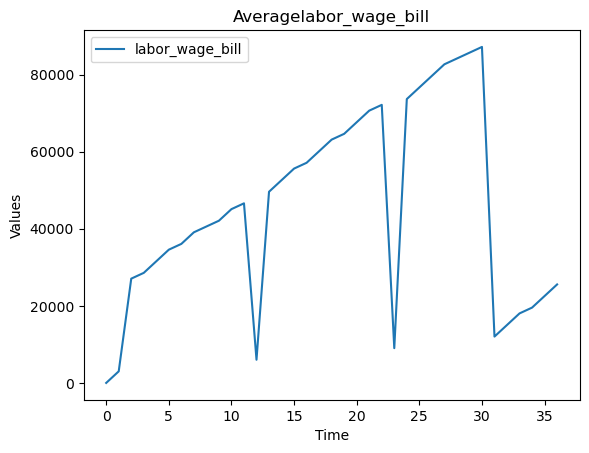

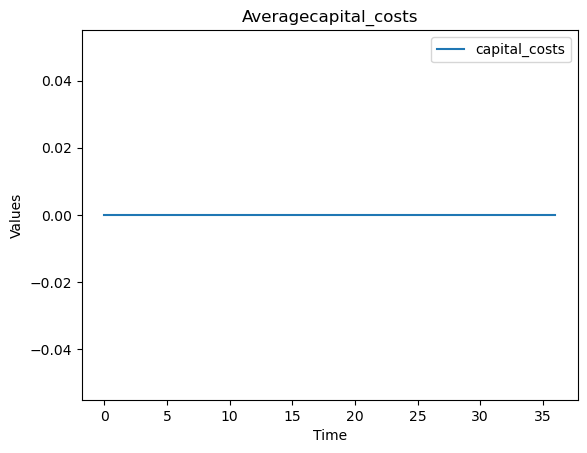

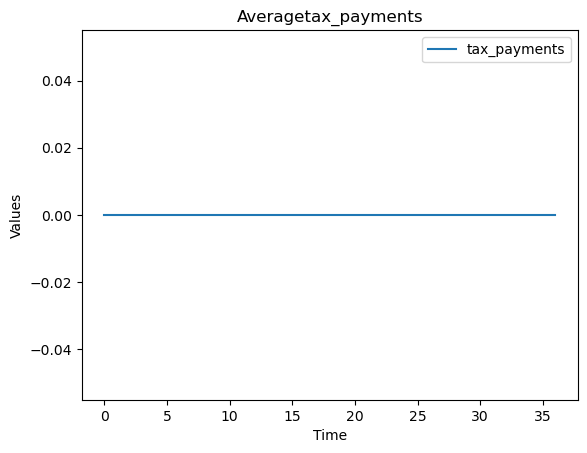

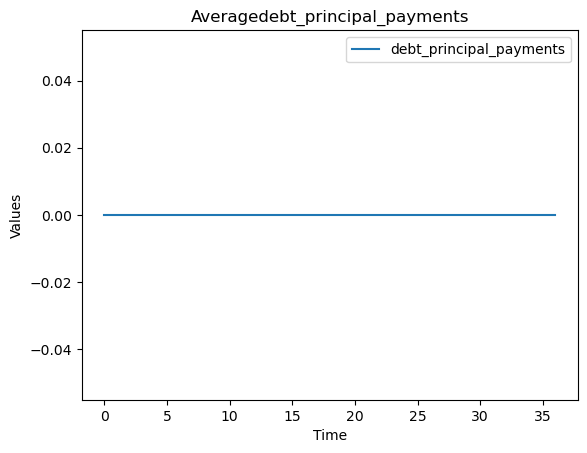

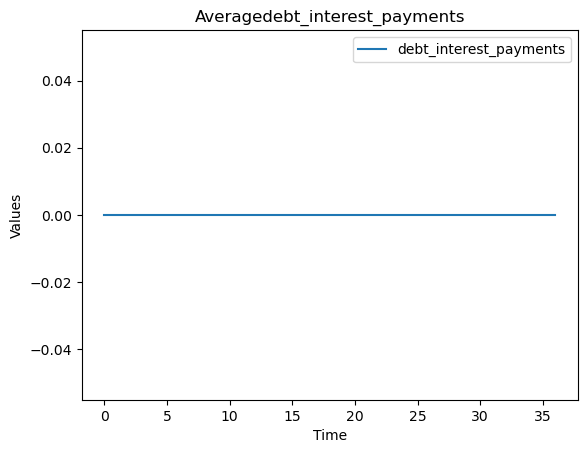

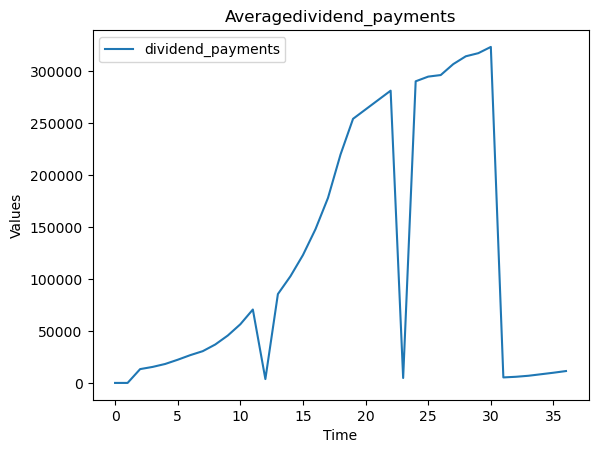

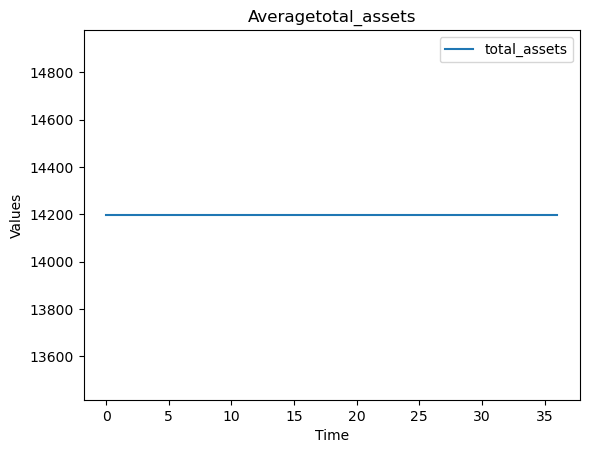

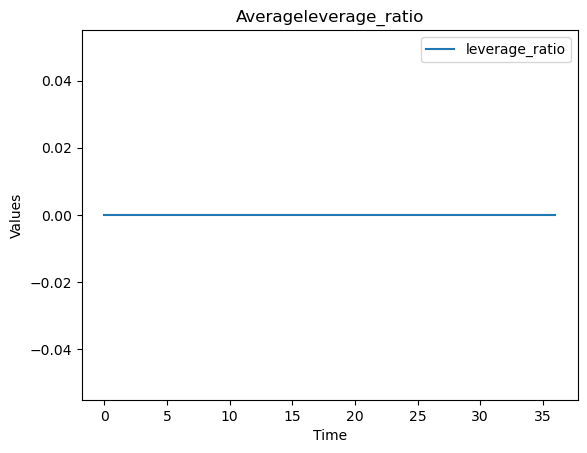

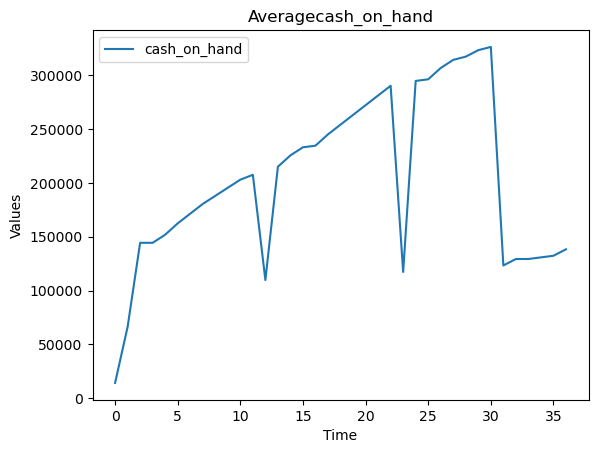

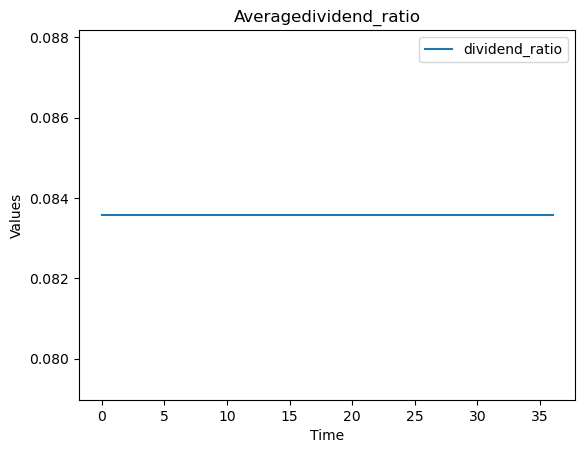

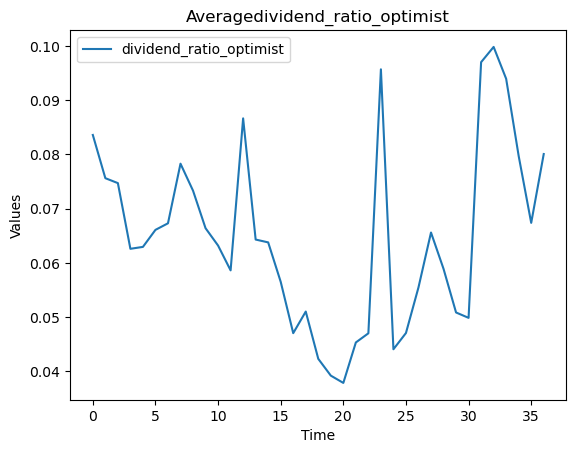

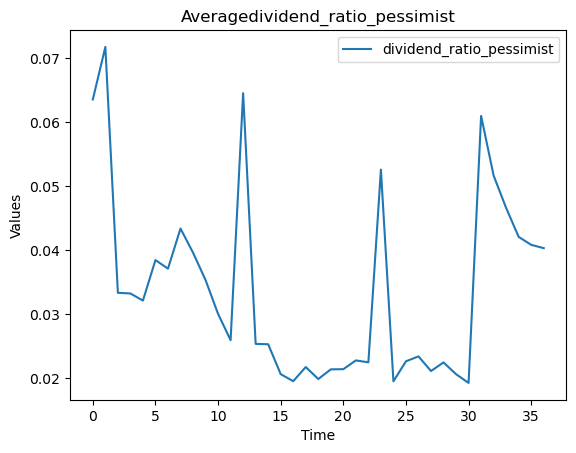

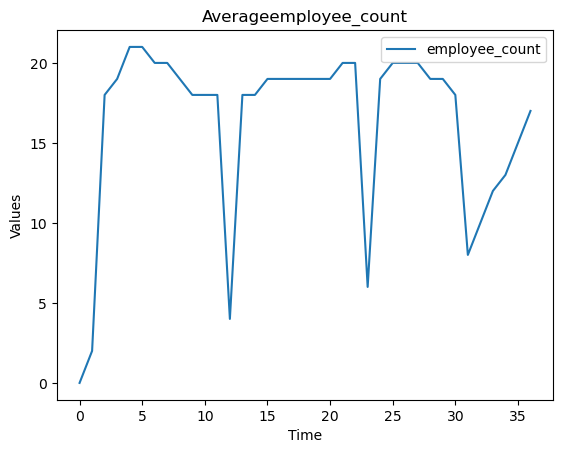

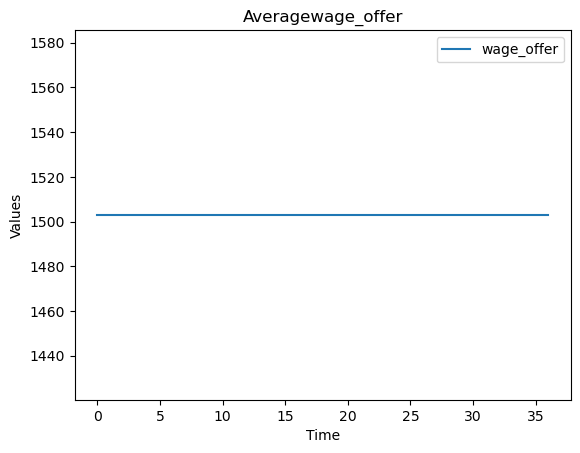

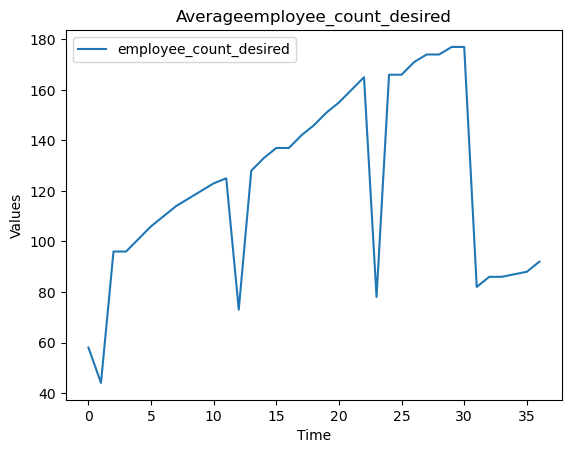

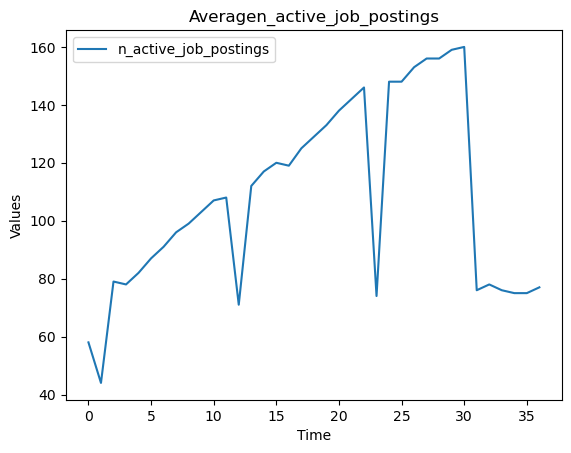

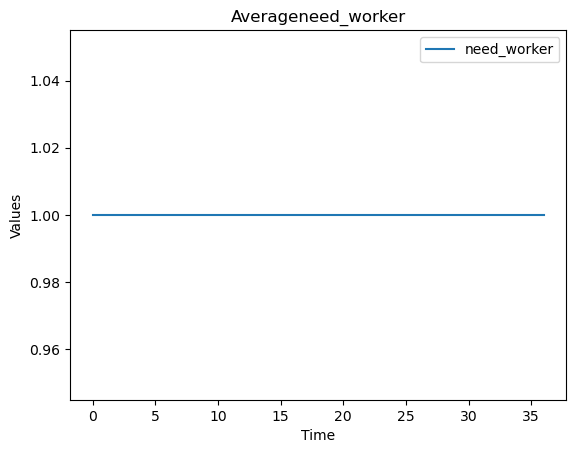

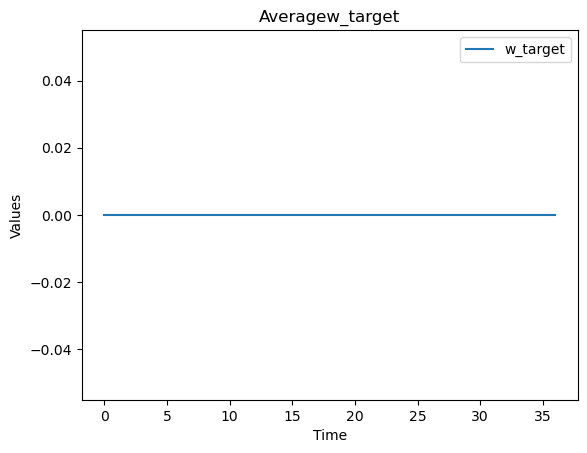

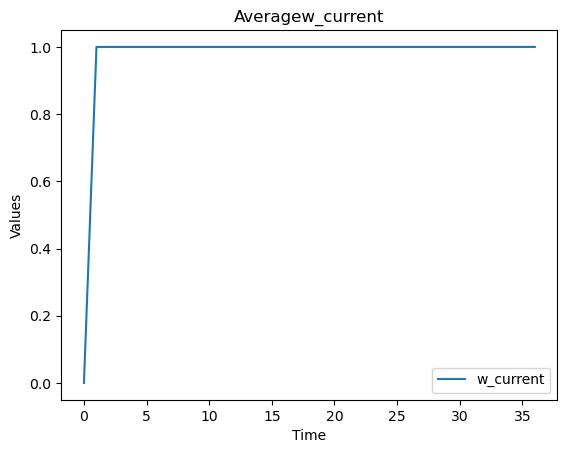

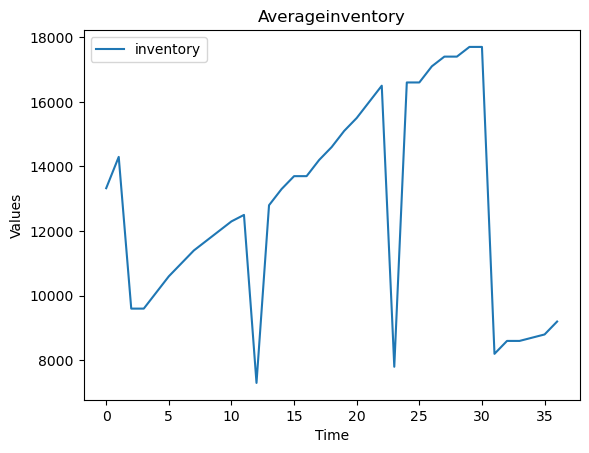

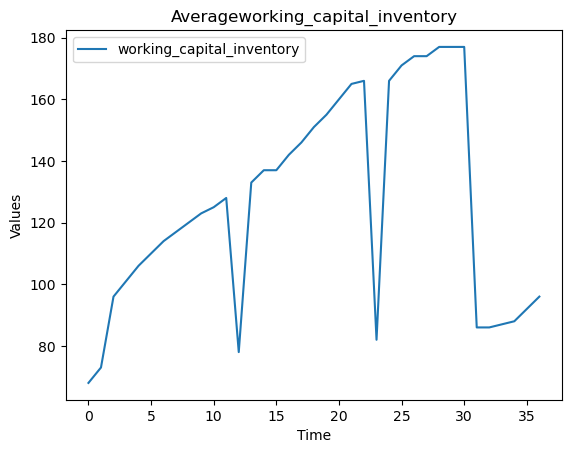

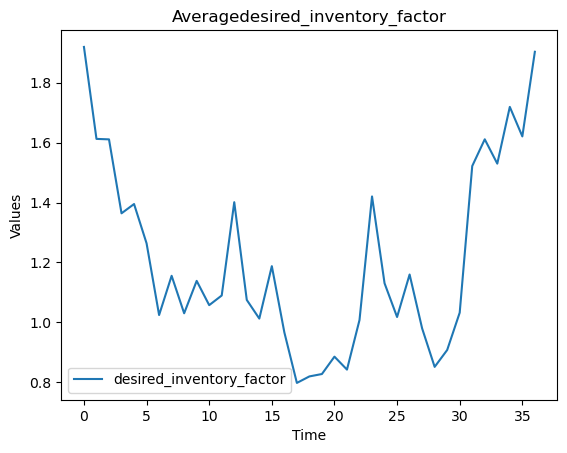

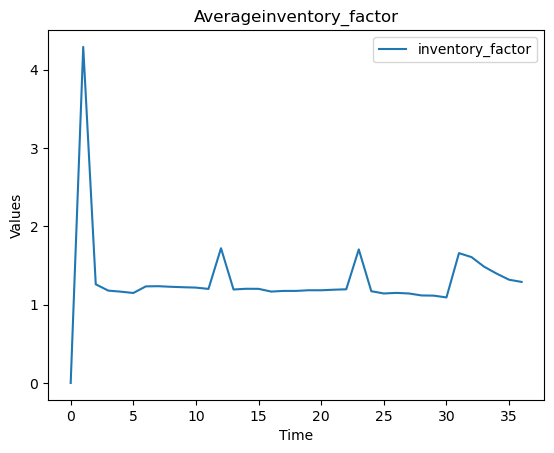

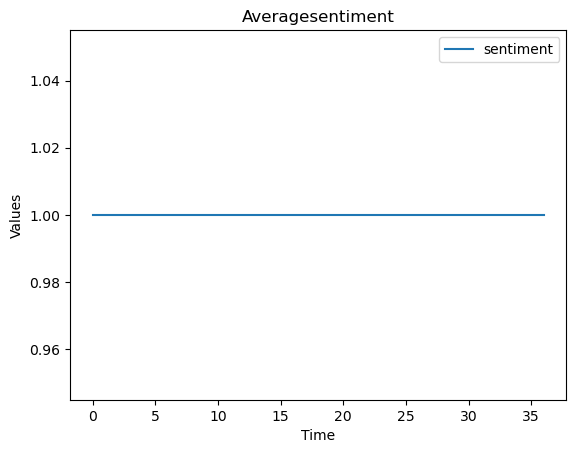

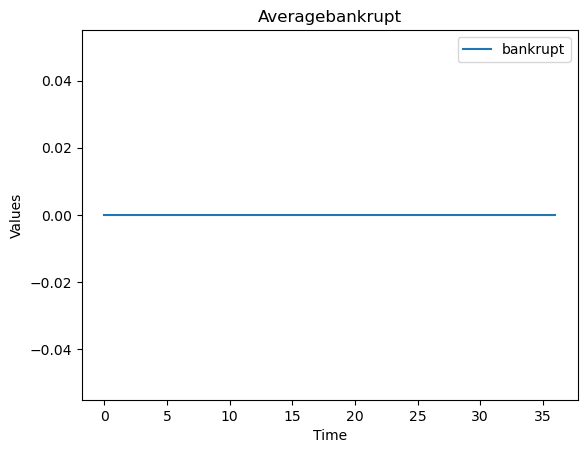

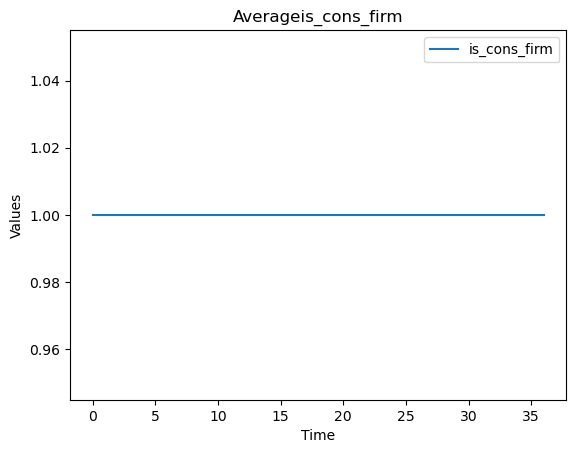

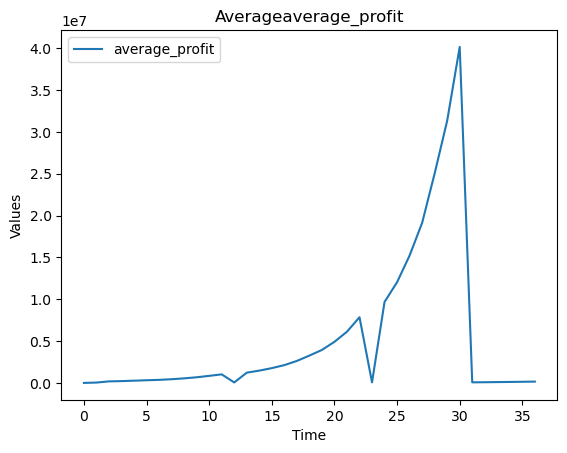

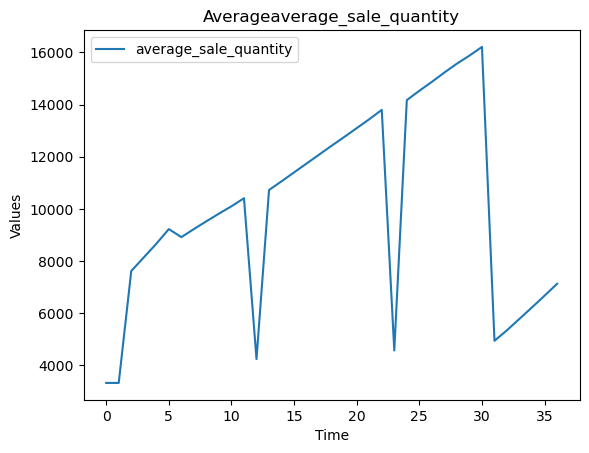

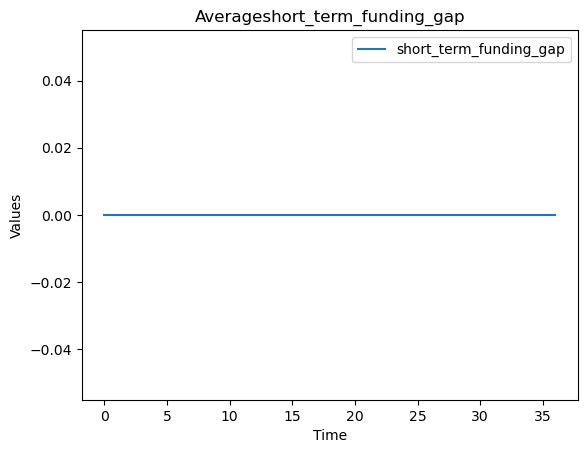

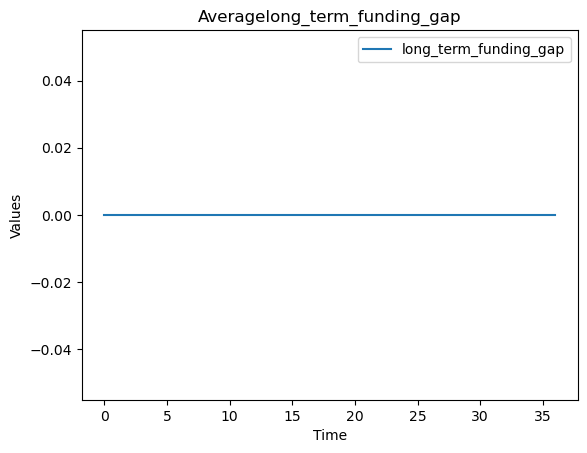

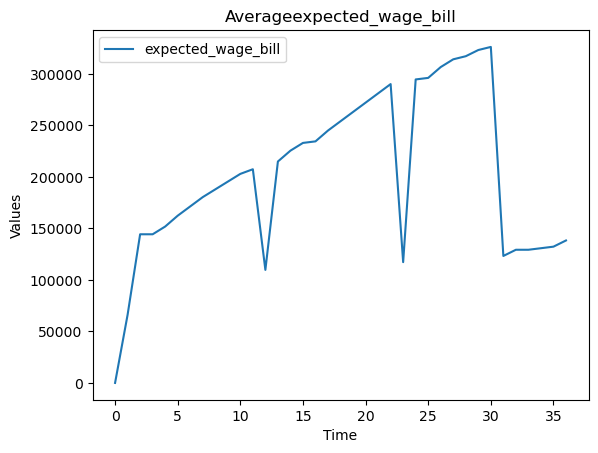

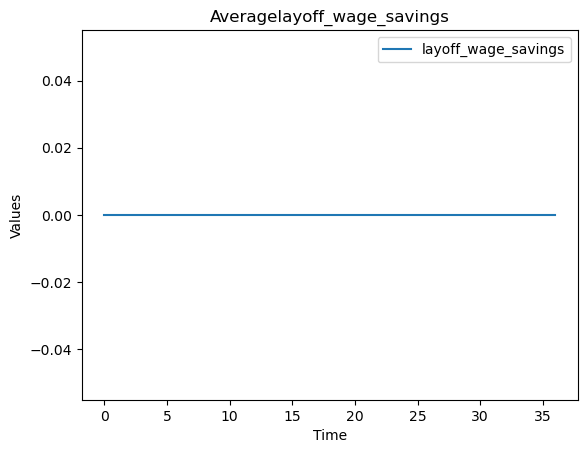

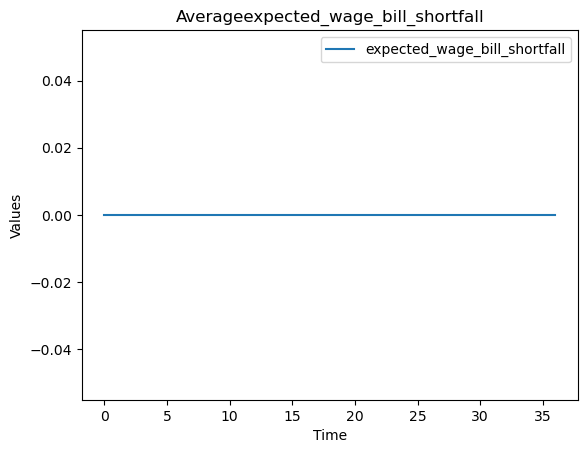

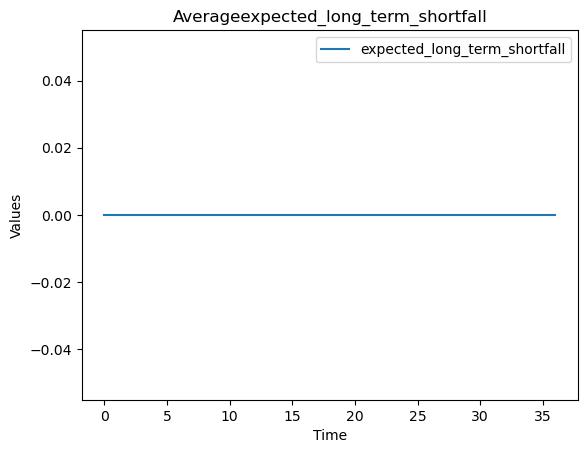

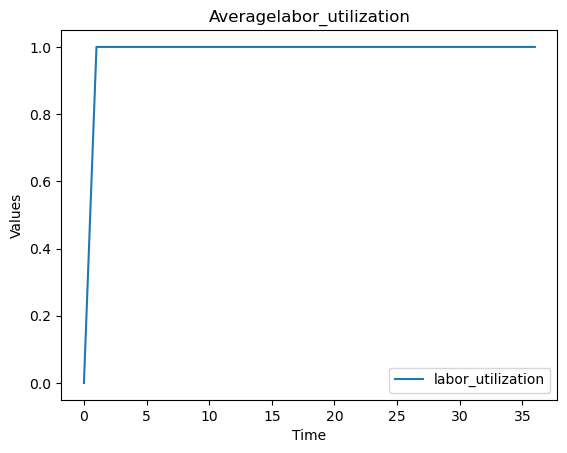

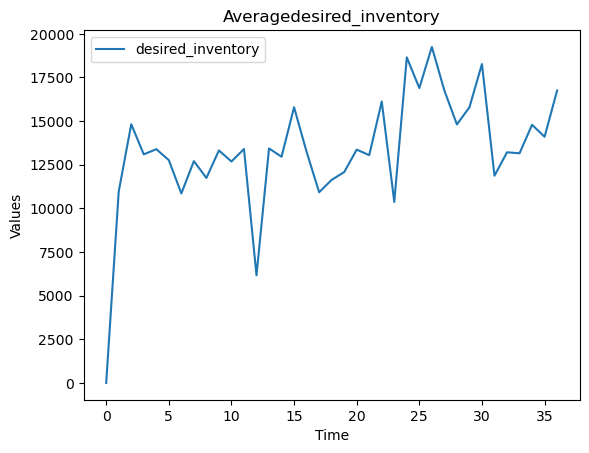

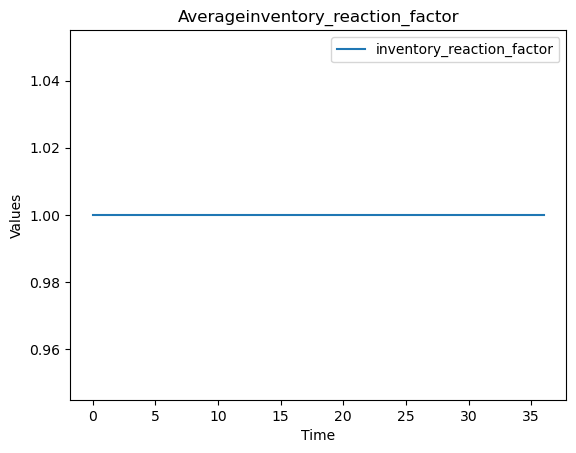

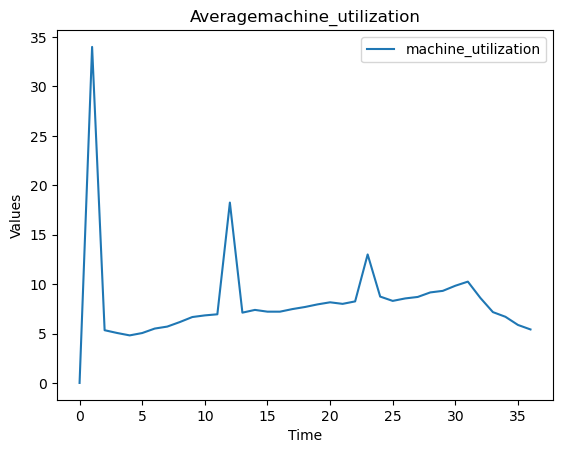

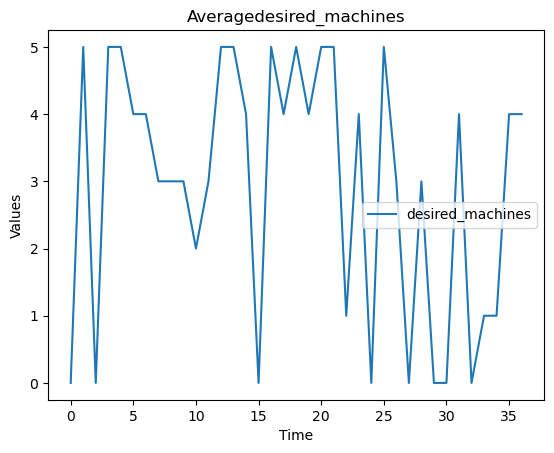

In [102]:
# averages for Consumer firm
for column in average_cols:
    plt.plot(t, cons_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

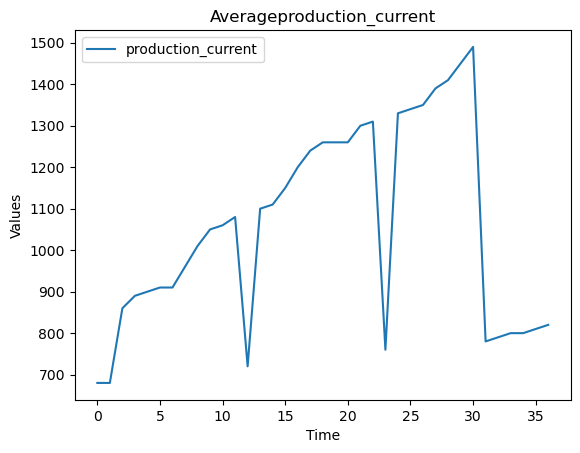

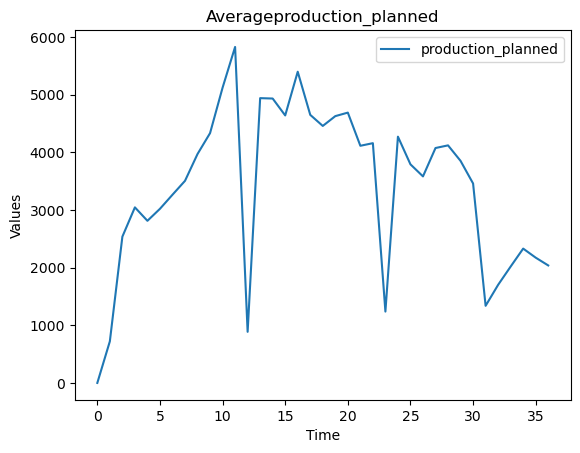

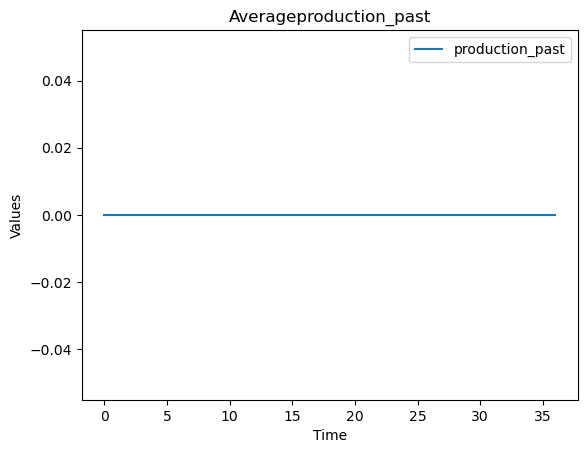

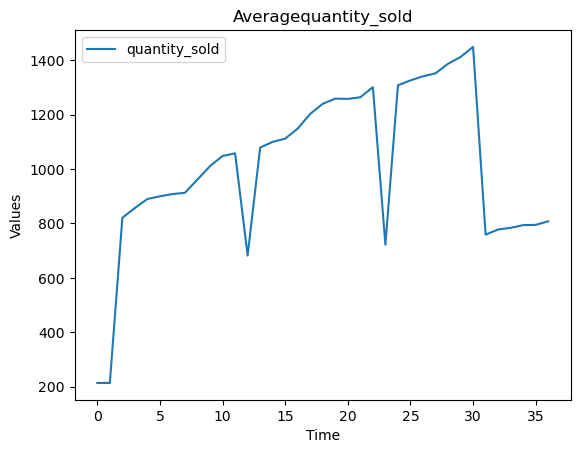

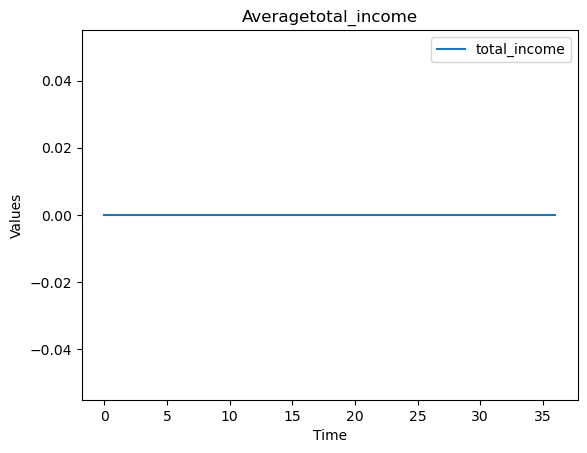

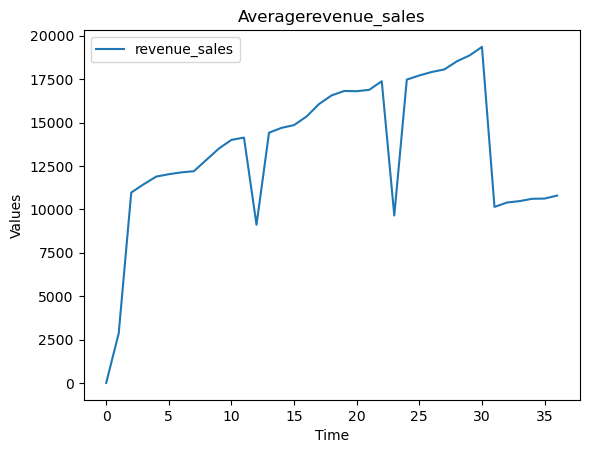

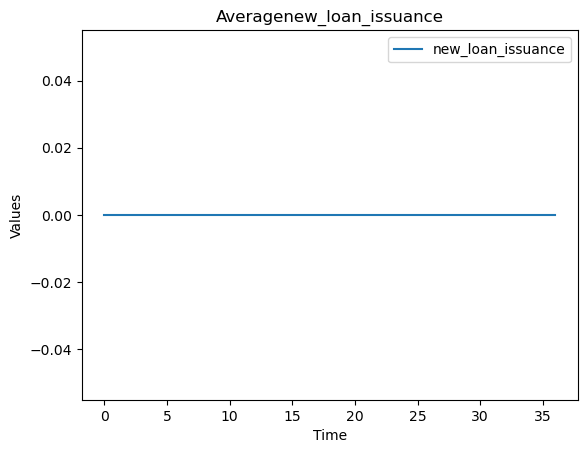

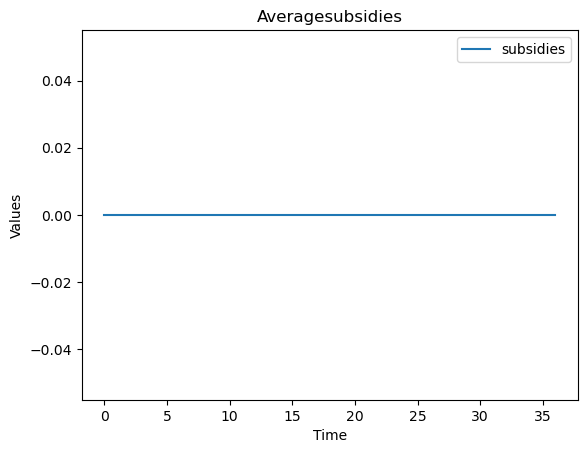

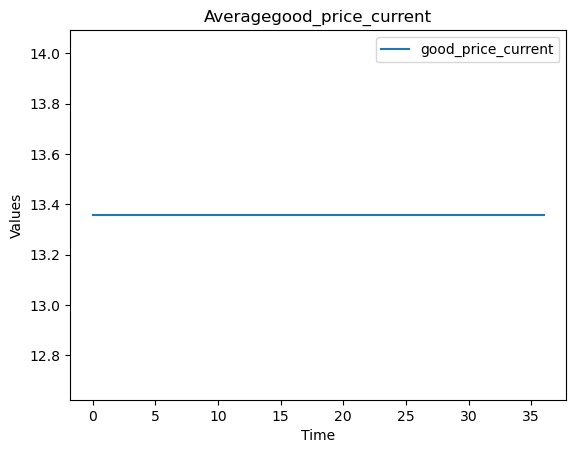

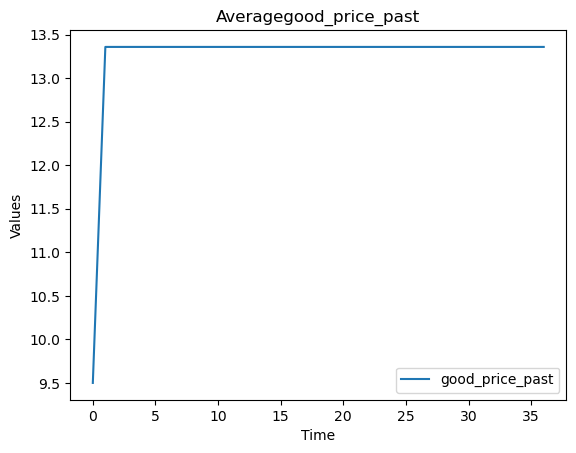

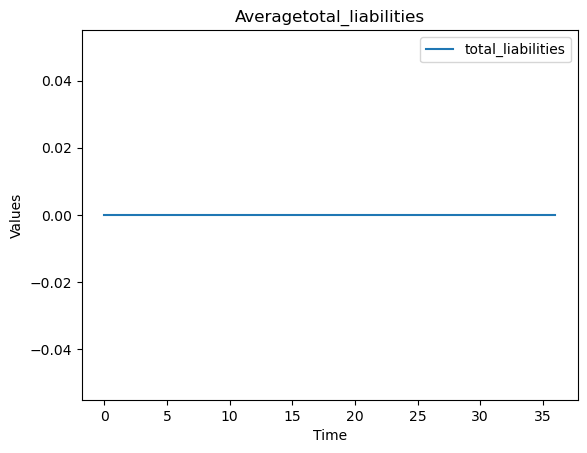

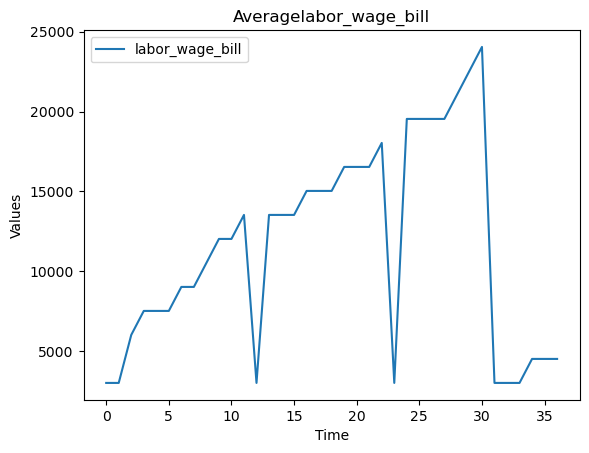

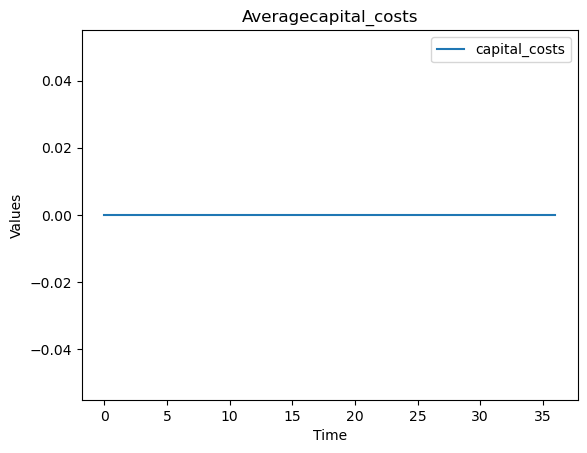

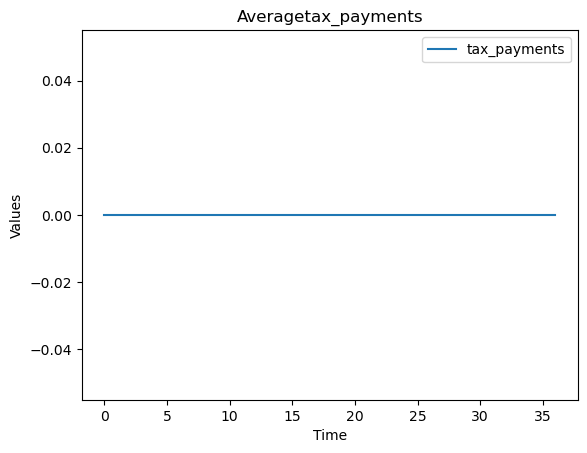

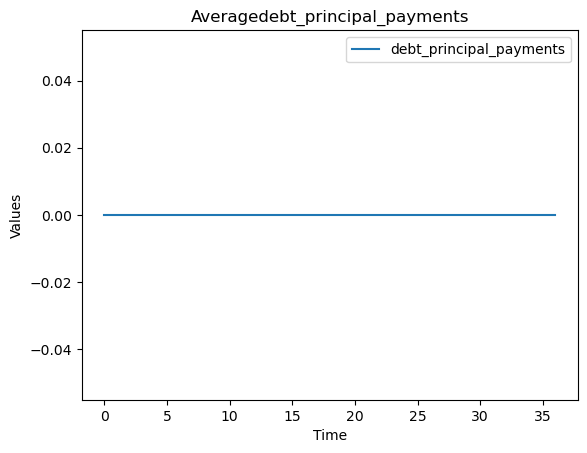

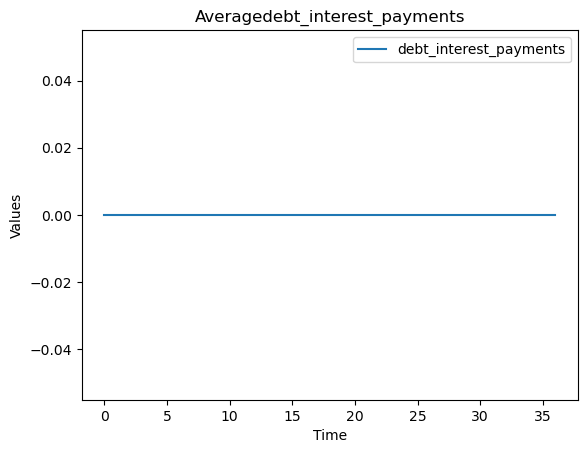

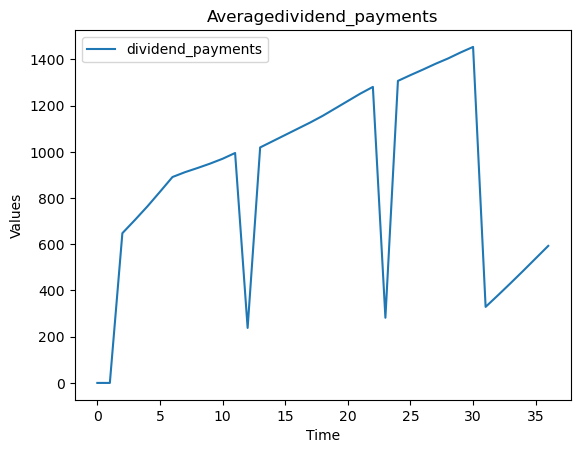

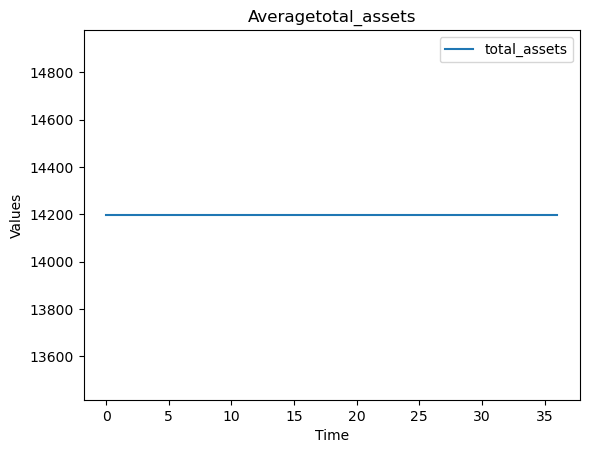

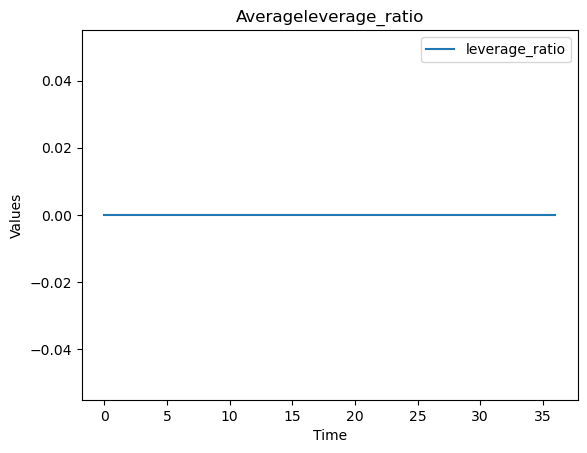

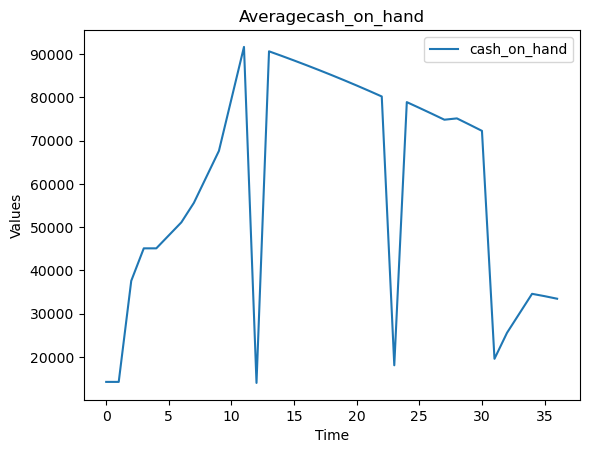

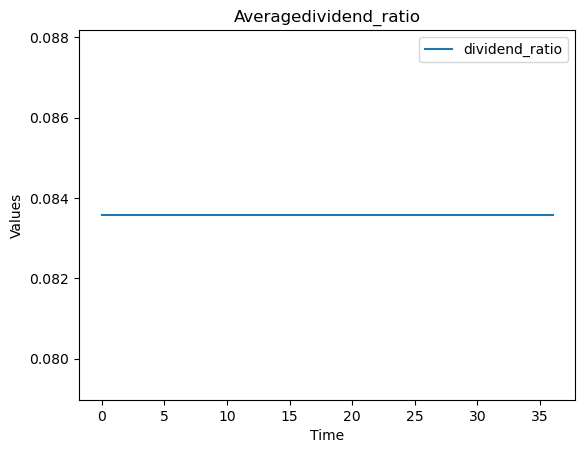

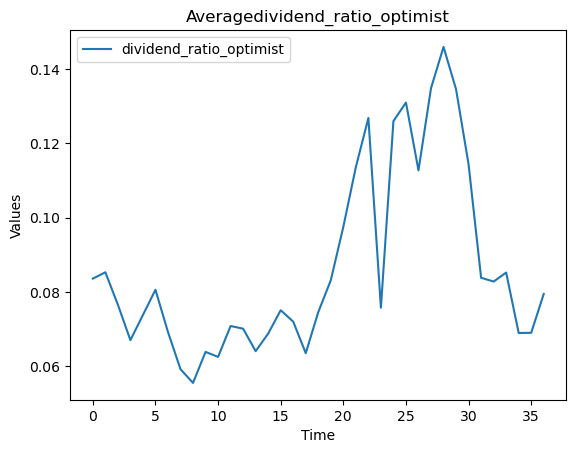

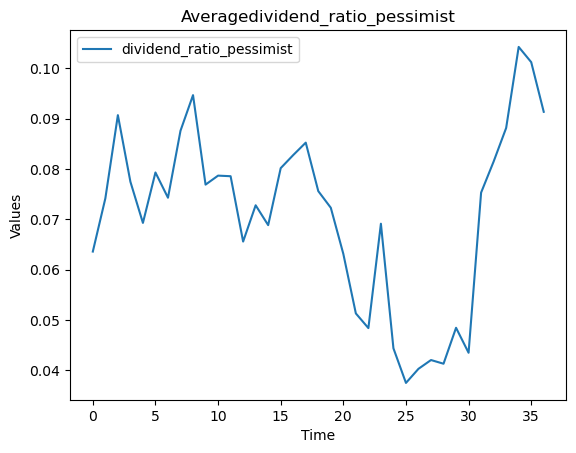

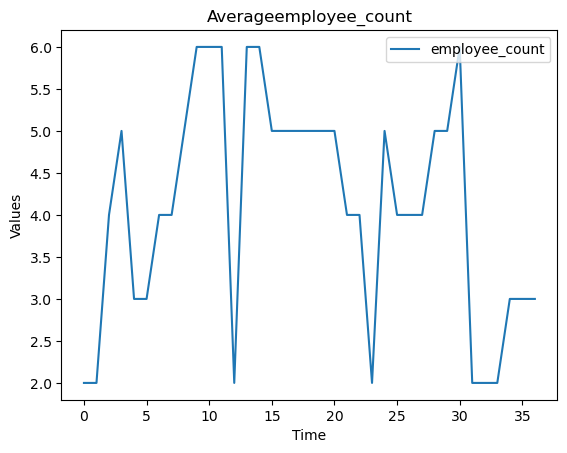

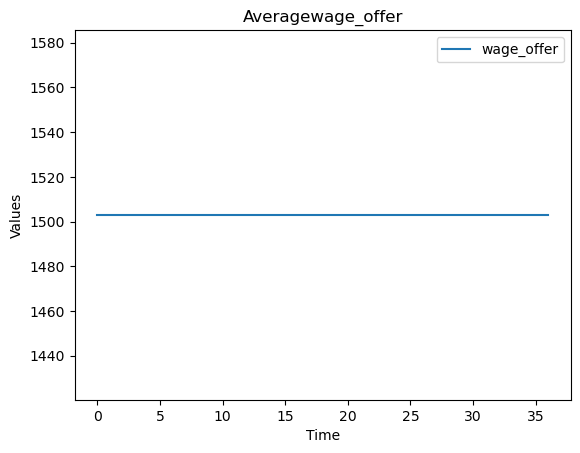

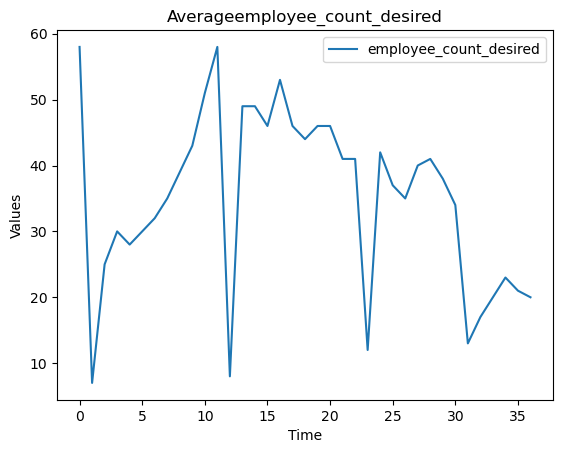

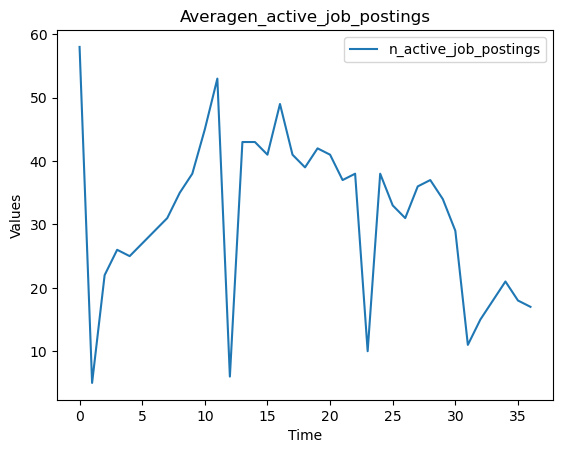

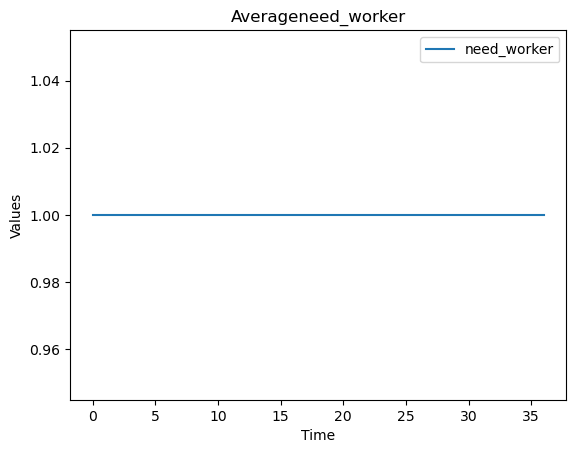

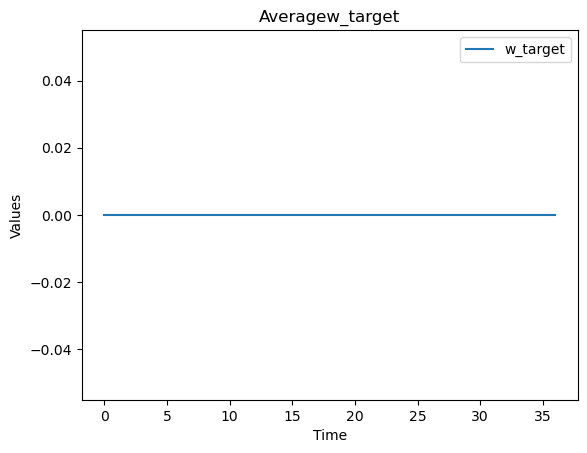

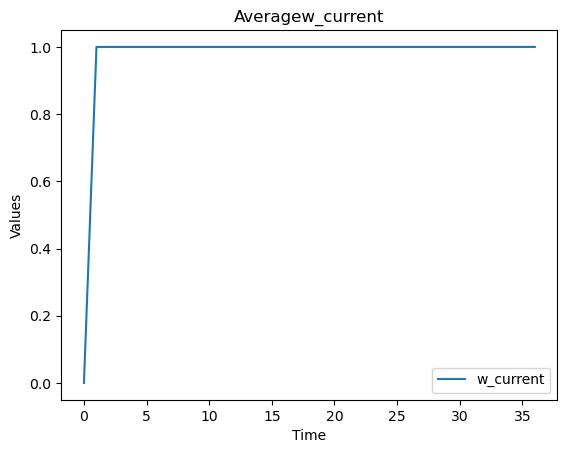

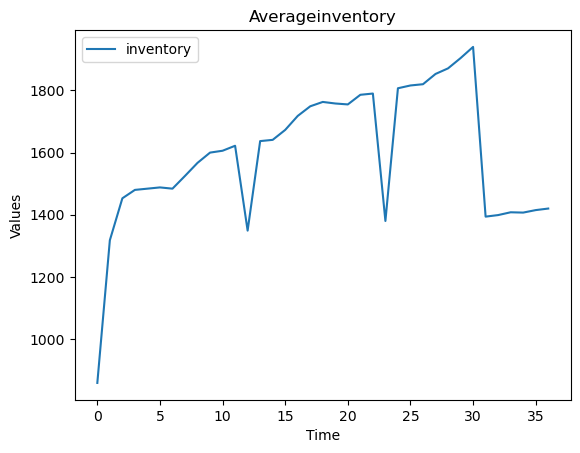

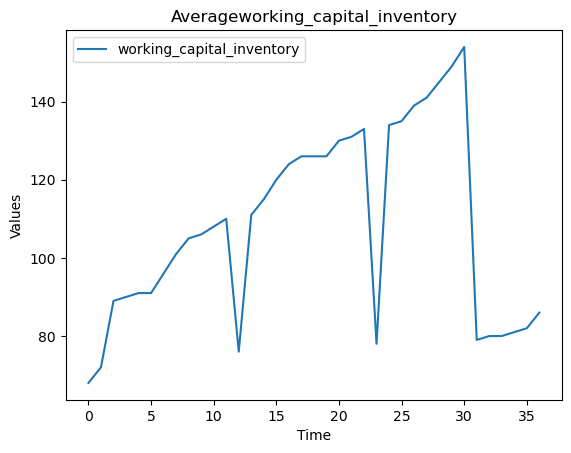

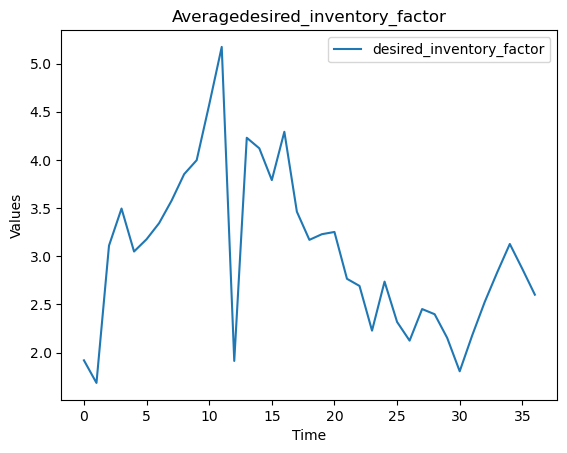

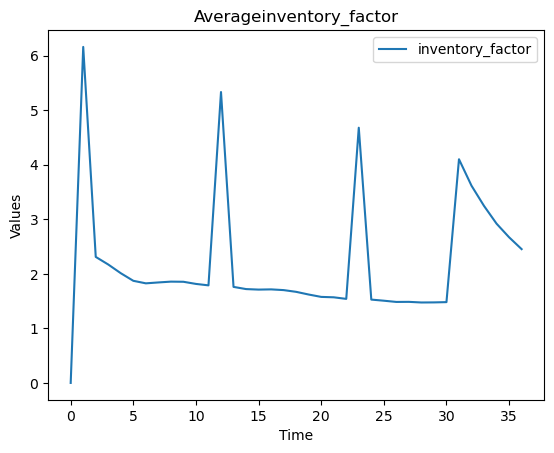

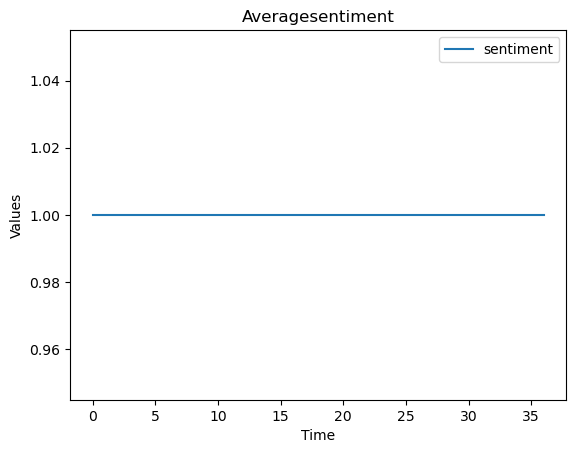

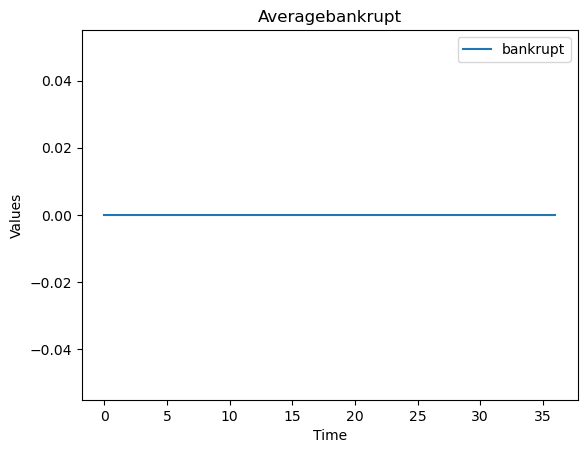

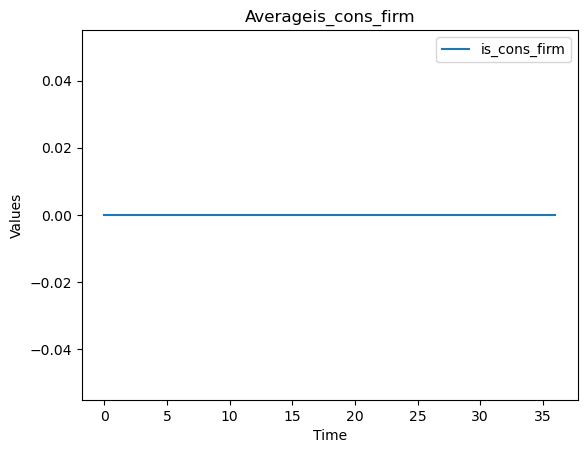

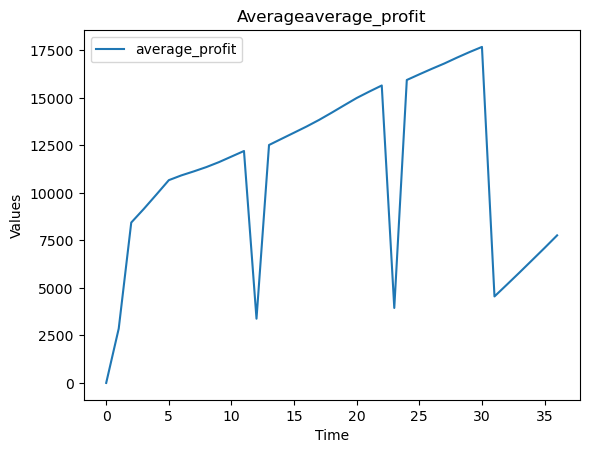

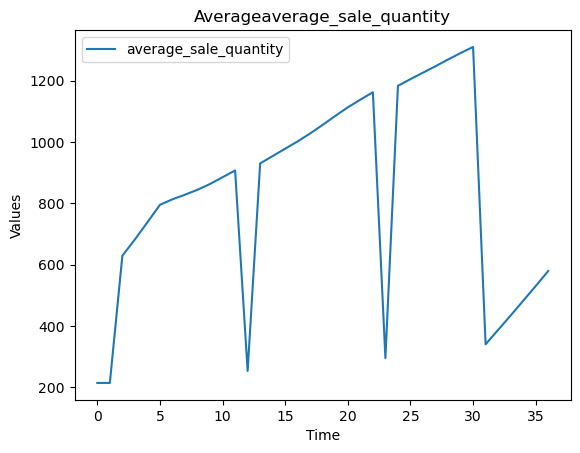

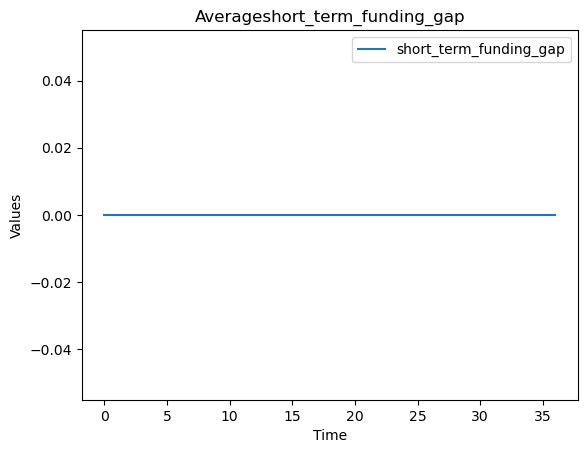

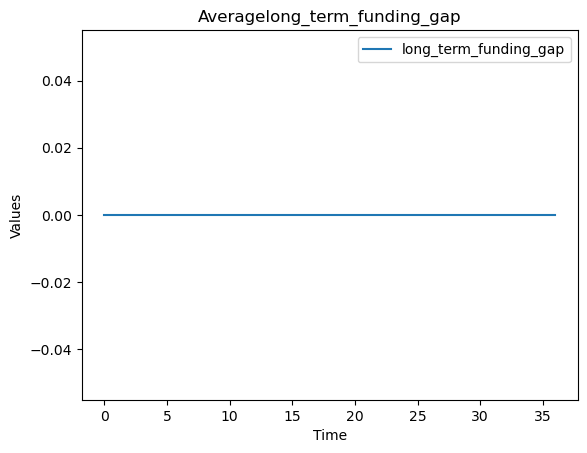

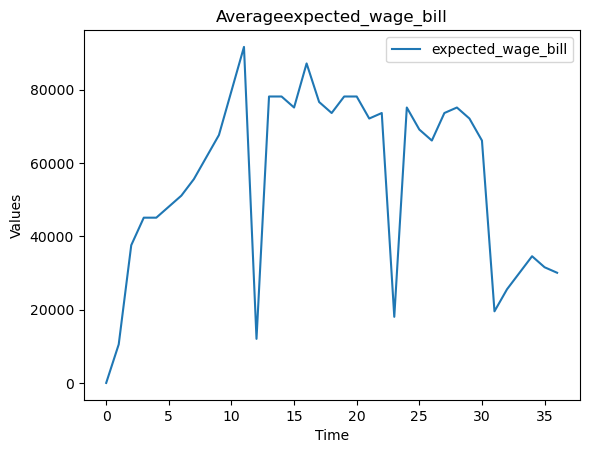

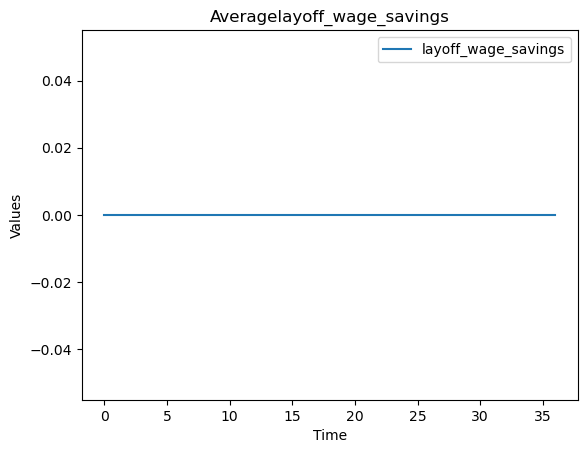

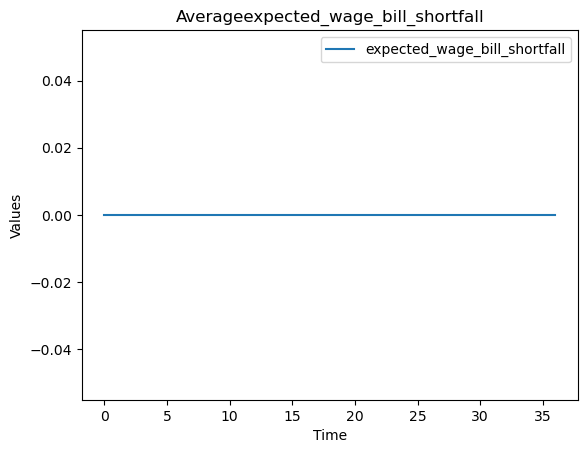

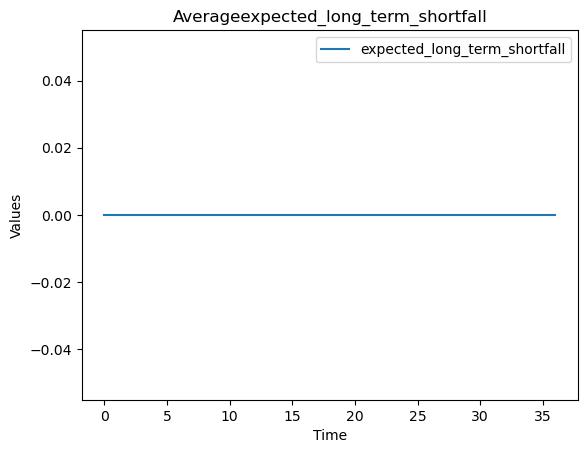

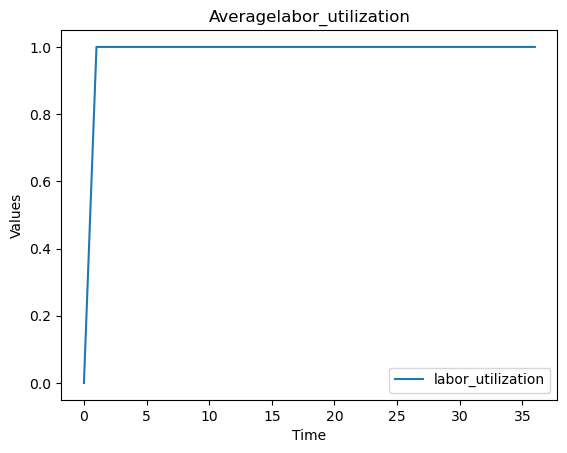

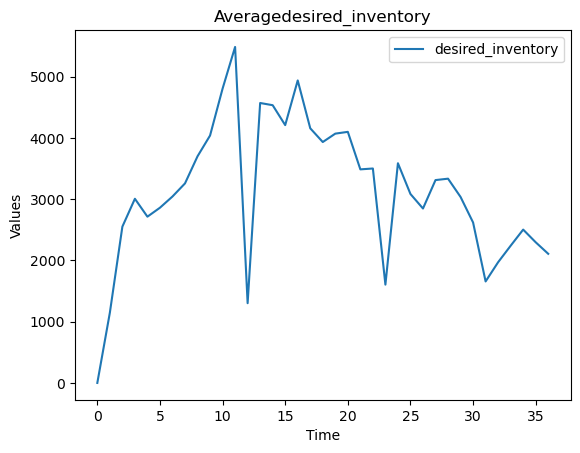

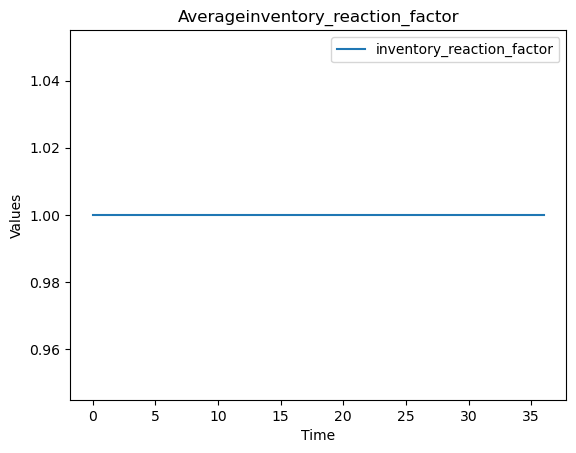

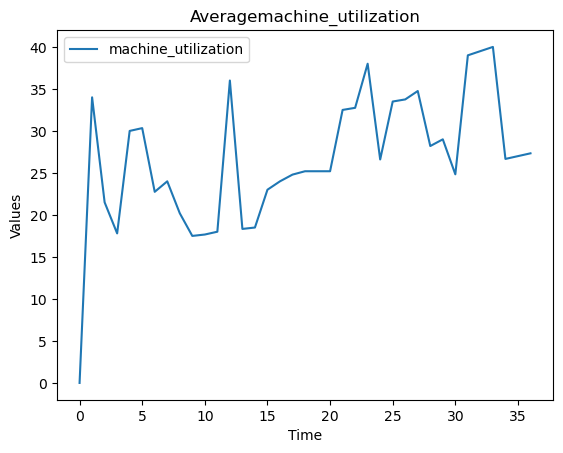

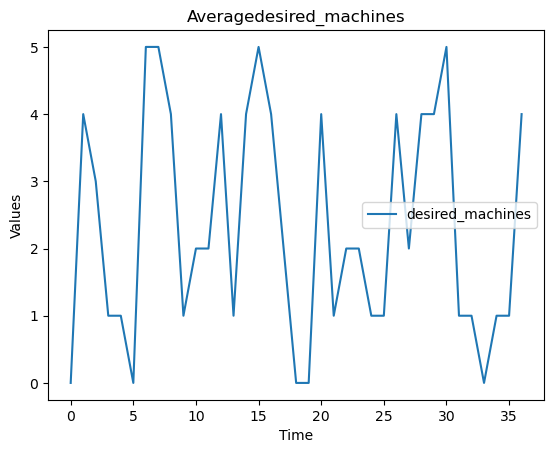

In [103]:
# averages for Capital firm
for column in average_cols:
    plt.plot(t, cap_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()